In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as sts
import math
import re
import operator


#for Hypothesis testing
from scipy.stats import binom, poisson, geom, norm, expon  # distribution  
from scipy.stats import shapiro, normaltest, levene, kruskal  # nArmality test
import statsmodels.api as sm                                  # qqplot
from scipy.stats import pearsonr, spearmanr, chi2_contingency   # correlAtion test
from statsmodels.tsa.stattools import adfuller, kpss # stAstanary test
from statsmodels.stats.weightstats import ztest  #num hypothesis testing
from scipy.stats import ttest_ind, ttest_rel, f_oneway, chi2   # parametric hypothisis testing


# for NLTK
import nltk
from wordcloud import WordCloud, STOPWORDS
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
wnl = WordNetLemmatizer()
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Error loading stopwords: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>
[nltk_data] Error loading punkt: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>
[nltk_data] Error loading wordnet: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


False

In [2]:
data = pd.read_csv("fake_job_postings_dataset.csv")
data.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


1. <b>Here we will be giving job description so that we can find which job is accurate and which are all fake jobs so that the user can easily identify and can apply to the actual jobs and truthful jobs that are being posted  we use basic EDA For this job description project</b>

1. May be here some of the columns are object d type and some of the columns are in 64 type so which means we have only 2 categories so that are object that is string and integer respectively

1. job ID is similar to serial number so we don't have any big kind of impact on this

1. title is something very intrusive and location also maybe department and salary range in most cases we see that salary range this not a number and then we have company profile description and requirement and benefits which are of a big strings mostly they need a very large regular expression kind of thing to detailed analysis 

1. company profile with is literally telling about the companies background and description is telling about the job description so which you will be working on and the requirement is which are all the basic things that you need to get a job so baby this 3 columns are very more important

1. And then we come back with benefits telecommunication company logo so basically company logo doesn't play any important role here has questions even though doesn't comes enough very good manner 

1. employee type may be so we have here a categorical kind of data and then required experience it is also some kind of categorical data required education is housework categorical data industry and function that comes under a kind of string kind of thing so we have variety of unique values here in resultant fault tolerant

1. so here we are about to find which kind of description matches or that is in queue commonly there in all the fault tolerance true that is 1 so if fraudulent is zero which means job descriptions is true and if it is one it is false so that that specific job description is said to be false so in this case we need to find out the relationship between all the false job descriptions may be and then which are all the factors that are influencing which adding an advantage to become an fraudulent job

1. <b>So for supporting this will be running some kind of hypothesis testing maybe correlation or independent test for dependency test between fraudulent and with mainly on employment type required experience required education industry function salary range title department and location so which are all like very much dependent on like with both each other so we will call we can create and come to a conclusion</b>

1. <b>and from company profile description and requirement so these are basically string kind of things so we need enough TK so the higher end to analyse this with a relation of fraudulent but that is being more higher now so will do basic regular expression d on which are all the common terms that are mainly found in fraudulent cases</b>

In [3]:
df0 = data.copy()
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15185 non-null  object
 8   benefits             10670 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

- So we have some null values here may be we need to take care of all the columns we have about 18 columns in which 7 columns that have all the values present in it and remaining 10 columns as many missing values so that has to be taking care very carefully!

In [4]:
df0.describe(include='all')

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
count,17880.000000,17880,17534,6333,2868,14572,17879,15185,10670,17880.000000,17880.000000,17880.000000,14409,10830,9775,12977,11425,17880.000000
unique,NaN,11231,3105,1337,874,1709,14801,11968,6205,NaN,NaN,NaN,5,7,13,131,37,NaN
top,NaN,English Teacher Abroad,"GB, LND, London",Sales,0-0,We help teachers get safe &amp; secure jobs ab...,"Play with kids, get paid for it Love travel? J...",University degree required. TEFL / TESOL / CEL...,See job description,NaN,NaN,NaN,Full-time,Mid-Senior level,Bachelor's Degree,Information Technology and Services,Information Technology,NaN
freq,NaN,311,718,551,142,726,379,410,726,NaN,NaN,NaN,11620,3809,5145,1734,1749,NaN
mean,8940.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.042897,0.795302,0.491723,NaN,NaN,NaN,NaN,NaN,0.048434
std,5161.655742,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.202631,0.403492,0.499945,NaN,NaN,NaN,NaN,NaN,0.214688
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000
25%,4470.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000
50%,8940.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000
75%,13410.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000


- Here for fraudulent jobs been need to find some similarities with them so that such things that doesn't exist r exist very less in normal job descriptions so here first we will be separating as a first priority that is fraudulent message and non fraudulent messages and then we will compare it's location department salary range and some of its key components

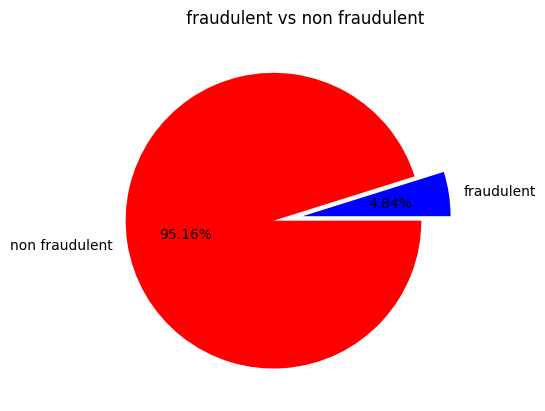

In [5]:
df_f = df0[df0['fraudulent'] == 1]  #fraudulent
df_nf = df0[df0['fraudulent'] == 0]  # non fraudulent

plt.title(' fraudulent vs non fraudulent')
plt.pie([df_f.shape[0], df_nf.shape[0]], 
        labels=['fraudulent', 'non fraudulent'], 
        explode=(0, 0.2),
        autopct='%1.2f%%',
       colors=['blue','red'])
plt.show()

##

## <U>1. Null values Fixing</u>

In [6]:
df0.isnull().sum().sort_values(ascending= False)

salary_range           15012
department             11547
required_education      8105
benefits                7210
required_experience     7050
function                6455
industry                4903
employment_type         3471
company_profile         3308
requirements            2695
location                 346
description                1
job_id                     0
telecommuting              0
has_questions              0
has_company_logo           0
title                      0
fraudulent                 0
dtype: int64

In [7]:
df0.isnull().sum().sort_values(ascending= False) * 100// len(df0)  #in persentage

salary_range           83
department             64
required_education     45
benefits               40
required_experience    39
function               36
industry               27
employment_type        19
company_profile        18
requirements           15
location                1
description             0
job_id                  0
telecommuting           0
has_questions           0
has_company_logo        0
title                   0
fraudulent              0
dtype: int64

1. We will start with fixing the null values here so here we have location value basically location v caught to wait in a better way so better to drop all the 300 rows and for department I could see that like some of the job titles does not have any specific departments so for the all the remaining null values we will give a department called unknown

1. and for salary range and there are about only 3000 rows that are there but most of the salary rows are empty so which means salaries are not specified so maybe we can give that not specified which is level zero of salary range I could see the salary ranges of object type maybe this can be in a categorical data so which means law salary range or unknown salary range that we are about to fix it will be zero and then the above and low salary is of 1 and the mid salary 2 and then high salary 3 something like that

1. it is better to draw those those which does not have any company profile description and requirements benefits because we can't add company descriptions specify it so better to drop it in this case

1. In employee sahib there are only I think full time part time other so it is better to have this nan values to be other And record experience also to be not applicable

1. In some cases I could see that required education s null but basically for every job description at least we need a bachelor's degree that is a basic thing so we will fill all this null values with bachelor's degree the very basic

1. Industries and functions it is also something very irrespective TO particular industries so we can't fill this out so will remove this course which are all having it


- <b>Basically I have a doubt here which is if some columns are empty the key requirement columns are empty then which we can also save card these job descriptions can be fraudulent so that what we will do is the data which we have separated F, NF we apply drop na to both of these data so that we can see how many datas are been dropped in how many percentage let's say if it is a fraudulent data set and has a size of about 800 in which 500 roads are Mt so that which we can say that with the probability of 60% if the rows are empty then it is friedland</b>


In [8]:
print('before drop', df_f.shape)
df0_f = df_f.dropna(subset=['title','company_profile','description','requirements','employment_type','required_experience','required_education','industry','function'])
print('after drop', df0_f.shape)

before drop (866, 18)
after drop (197, 18)


- <b>I dropped the non important columns so that these columns are mandatory for a job description basically so if we dont have these columns so we are assuming that start job description will be false so out of 866 we have only 197 rows reminding which means 22% or non fraudulent which means this concert works with an efficiency of 77.25 percentage if we dont have values in these particular columns we can say that pictures of redolent job description with the percentage of 77.25</b>


In [9]:
print('before drop', df_nf.shape)
df0_nf = df_nf.dropna(subset=['title','company_profile','description','requirements','employment_type','required_experience','required_education','industry','function'])
print('after drop', df0_nf.shape)

before drop (17014, 18)
after drop (5971, 18)


- <b>And for non fraudulent even the same condition applies so in here we can see that if we dont have when use in these columns it is said to be non-fraudulent jobs with the efficiency of 64.9 percentage</b><br><br>
- <b>if its a fraudulent given that we have atleast one null value that is 77.25 percentag <br> if its a Non fraudulent given that we have atleast one null value that is 64.9 percentage</b>

- <b>In this case we have many null values basically some rules have vast number of null values so there are only 2 outputs will be considering here either will be filling all the null values so that which can also lead in false prediction and even if we drop all those null values it shrinks all the data set from 17,000 to 3000 maybe so which is very hard to predict which are which cannot be more accurate and result so we need a particular column to be taken care more specifically whether in that values can be dropped or can be filled.</b>

- For this let us consider which are all the columns are high priority requirement columns and which columns that does not impact on results so we will split the data with only columns which are mostly required

- Important columns are title, department, company profile, description, requirement, employment type, required experience, industry and function so from this if we take out the data and then we will drop columns which are null then we will remind with the least number of rows in this column so department has 6333 rows so maybe we will remind end up with a data set having 6300 rose which is literally 40% of data restart the case then we will even drop the department column so that we can have maybe 10,000 rows

#### A. <u>Fixing null values for department</u>

In [10]:
df01 = df0[['department', 'function']]
df01['department'].isnull().sum()   #number of null before fixing

11547

- I have found that like for column filling the column department we can use the column called function so in this function we have literally just 36% of datas are missing but when you compare with department 64% of the datas are missing so we can fill if this logic works like when comparing with department and function which are all existing like both function and department or existing when we compare with them values if it's matching case are very high then we can fill with if department is nan and function we have as something called administrative our department we can fill it with the appropriate function value so we can fill up to 32% of the data

In [11]:
df02 = df01.drop_duplicates(keep='first')
df03 = df02.dropna()
df04 = np.intersect1d(df03['department'], df03['function'])
df04

array(['Administrative', 'Advertising', 'Business Development',
       'Consulting', 'Customer Service', 'Design', 'Education',
       'Engineering', 'Finance', 'Human Resources',
       'Information Technology', 'Legal', 'Management', 'Manufacturing',
       'Marketing', 'Other', 'Product Management', 'Production',
       'Project Management', 'Public Relations', 'Purchasing',
       'Quality Assurance', 'Research', 'Sales', 'Supply Chain',
       'Training'], dtype=object)

In [12]:
df01 = df01.fillna(value= '-')
matching_count = 0
non_matching_case = 0
filled_count = 0

for i in range(0, len(df01['department'])):
    if (df01['department'][i] == '-') and ((df01['function'][i] in df04) or (df01['function'][i]) ):
        df01['department'][i] = df01['function'][i]
        filled_count += 1
    if (df01['department'][i] != '-') and (df01['department'][i] == df01['function'][i] ):
        matching_count += 1
    if (df01['department'][i] != '-') and (df01['department'][i] != df01['function'][i] ):
        non_matching_case += 1

for i in range(0, len(df01['department'])):
    if (df01['department'][i] == '-'):
        df01['department'][i] = None

print('matching count',matching_count,
'\nnon matching count',non_matching_case,
'\nfilled count',filled_count)
df01['department'].isnull().sum()   ##null values after fixing

matching count 8342 
non matching count 4635 
filled count 11547


4903

- From this weekend come to know that before updating the null values for column department we have about 11,547 values that are null but after fixing it according to this procedure so we have about like 4903 null values now so we have fixed the vote 6500 values in the department column


In [13]:
df0['department'] = df01['department']
df0.isnull().sum().sort_values(ascending= False) * 100// len(df0)  #in persentage

salary_range           83
required_education     45
benefits               40
required_experience    39
function               36
department             27
industry               27
employment_type        19
company_profile        18
requirements           15
location                1
description             0
job_id                  0
telecommuting           0
has_questions           0
has_company_logo        0
title                   0
fraudulent              0
dtype: int64

- <b>So from this we have decreased the null values of department column from <u>64% to 27%</u></b>

#### B. <u>Fixing Null values for function</u>

In [14]:
df01 = df0[['department', 'function']]
df01['function'].isnull().sum()   #number of null before fixing

6455

In [15]:
df02 = df01.drop_duplicates(keep='first')
df03 = df02.dropna()
df04 = np.intersect1d(df03['department'], df03['function'])
df04

array(['Accounting/Auditing', 'Administrative', 'Advertising',
       'Art/Creative', 'Business Analyst', 'Business Development',
       'Consulting', 'Customer Service', 'Data Analyst', 'Design',
       'Distribution', 'Education', 'Engineering', 'Finance',
       'Financial Analyst', 'General Business', 'Health Care Provider',
       'Human Resources', 'Information Technology', 'Legal', 'Management',
       'Manufacturing', 'Marketing', 'Other', 'Product Management',
       'Production', 'Project Management', 'Public Relations',
       'Purchasing', 'Quality Assurance', 'Research', 'Sales', 'Science',
       'Strategy/Planning', 'Supply Chain', 'Training', 'Writing/Editing'],
      dtype=object)

In [16]:
#the back tracking case for functions are taken lly from department.
df01 = df01.fillna(value= '-')
for i in range(0, len(df01['function'])):
    if (df01['function'][i] == '-') and ((df01['department'][i] in df04) or (df01['department'][i]) ):
        df01['function'][i] = df01['department'][i]

for i in range(0, len(df01['function'])):
    if (df01['function'][i] == '-'):
        df01['function'][i] = None

df01['function'].isnull().sum()

4903

In [17]:
df0['function'] = df01['function']
df0.isnull().sum().sort_values(ascending= False) * 100// len(df0)  #in persentage

salary_range           83
required_education     45
benefits               40
required_experience    39
department             27
function               27
industry               27
employment_type        19
company_profile        18
requirements           15
location                1
description             0
job_id                  0
telecommuting           0
has_questions           0
has_company_logo        0
title                   0
fraudulent              0
dtype: int64

- <b>By applying a similar procedure which is carried by department column null value from function column has been reduced to flow <u>36% to 27%</u></b>

- We also decided that if both the columns department and function has a null value in it so will find out like how many percentage of data are leading to fraudulent and non fraudulent

In [18]:
df05 = df0[(df0['department'].isnull() == True) & (df0['function'].isnull() == True)]
count_fraud = len(df05[df05['fraudulent'] == 1])
print('given that both col department and function are Null and its a fraudulent',count_fraud,'->', round(count_fraud * 100/len(df05), 2),'%')
count_nonfraud = len(df05[df05['fraudulent'] == 0])
print('given that both col department and function are Null and its a Non fraudulent',count_nonfraud,'->',round(count_nonfraud * 100/len(df05),2),'%')

given that both col department and function are Null and its a fraudulent 257 -> 5.24 %
given that both col department and function are Null and its a Non fraudulent 4646 -> 94.76 %


- Even though we have a very small number of percentage if both the columns are not if it is a fraudulent but when we compare with total number of fraudulent messages we have about only 800 so in which 257 are contributing in this department and function, if both are null so we can see that, from apart from other depending columns this<b> 2 columns contribute about 30% in total fraudulent description</b>

#### C. <u>Fixing Null values for required_education and employment_type</u>

- I found one kind of thing which is similar with required experience and employment type so employment type benefits intern or entry level it is basically of bachelors required education when it is a senior level or mid senior level they are asking for bachelors degree masters degree and so on something like that so even with employment type required education is like word so in this required education has 45% of null values and when you compare with employment type at the address only of 19% so we can correlate and fix the null values

In [19]:
df06 = df0[['required_education', 'employment_type']]
df06 = df06.fillna(value= '-')
df0['required_education'].unique()

array([nan, "Bachelor's Degree", "Master's Degree",
       'High School or equivalent', 'Unspecified',
       'Some College Coursework Completed', 'Vocational', 'Certification',
       'Associate Degree', 'Professional', 'Doctorate',
       'Some High School Coursework', 'Vocational - Degree',
       'Vocational - HS Diploma'], dtype=object)

In [20]:
dic_reqexp = {  "Bachelor's Degree": {}, "Master's Degree": {},'High School or equivalent': {},
                'Unspecified': {},'Some College Coursework Completed': {},'Vocational': {}, 
                'Certification': {},'Associate Degree': {}, 'Professional': {},'Doctorate': {},
              'Some High School Coursework': {}, 'Vocational - Degree': {},'Vocational - HS Diploma': {}
             }
for i in range(0, len(df06['required_education'])):
    if (df06['required_education'][i] != '-') and (df06['employment_type'][i] != '-'):
        if df06['employment_type'][i] in dic_reqexp[df06['required_education'][i]]:
            dic_reqexp[df06['required_education'][i]][df06['employment_type'][i]] += 1
        else:
            dic_reqexp[df06['required_education'][i]][df06['employment_type'][i]] = 1
            
df07 = pd.DataFrame(dic_reqexp)
df07

,Bachelor's Degree,Master's Degree,High School or equivalent,Unspecified,Some College Coursework Completed,Vocational,Certification,Associate Degree,Professional,Doctorate,Some High School Coursework,Vocational - Degree,Vocational - HS Diploma
Full-time,4029,363,1528,1114,45,34,115,230,55.0,26.0,4.0,4.0,9.0
Contract,935,21,45,94,8,2,23,9,14.0,NaN,NaN,NaN,NaN
Other,37,4,37,36,12,2,3,2,NaN,NaN,NaN,NaN,NaN
Temporary,38,5,29,58,9,3,8,3,NaN,NaN,NaN,1.0,NaN
Part-time,66,10,309,76,23,6,11,28,5.0,NaN,2.0,1.0,NaN


- From this we come to know that for full time work experience we need bachelor's degree and then for contract we can use the same bachelor's degree and for others it is optional whether we can use bachelor's degree or high or school equivalent so we are feeling null values from education add nalus with me employment type in both the scenarios in vice versa

In [21]:
dic_comp = (df07.T).to_dict()
# null value fixing for required_education same as employment_type
def func(name):
    dic_min = dic_comp[name]
    sorted_dic = sorted(dic_min.items(), key=operator.itemgetter(1),reverse=True)
    return sorted_dic[0][0]

matching_count = 0
non_matching_case = 0
filled_count = 0
for i in range(0, len(df06['required_education'])):
    if df06['employment_type'][i] != '-':
        if df06['required_education'][i] == '-':
            df06['required_education'][i] = func(df06['employment_type'][i])
            filled_count += 1
        elif df06['required_education'][i] != '-' and (df06['required_education'][i] == func(df06['employment_type'][i])):
            matching_count += 1
        else:
            non_matching_case += 1
            
            

In [22]:
print('matching count',matching_count,
      '\nnon matching count',non_matching_case,
      '\nfilled count',filled_count)

matching count 5368 
non matching count 4163 
filled count 4878


In [23]:
# null value fixing for employment_type same as required_education
dic_comp = dic_reqexp   

def func(name):
    dic_min = dic_reqexp[name]
    sorted_dic = sorted(dic_min.items(), key=operator.itemgetter(1),reverse=True)
    return sorted_dic[0][0]
        
matching_count = 0
non_matching_case = 0
filled_count = 0
for i in range(0, len(df06['employment_type'])):
    if df06['required_education'][i] != '-':
        if df06['employment_type'][i] == '-':
            df06['employment_type'][i] = func(df06['required_education'][i])
            filled_count += 1
        elif df06['employment_type'][i] != '-' and (df06['employment_type'][i] == func(df06['required_education'][i])):
            matching_count += 1
        else:
            non_matching_case += 1

In [24]:
print('matching count',matching_count,
      '\nnon matching count',non_matching_case,
      '\nfilled count',filled_count)

matching count 11620 
non matching count 2789 
filled count 244


In [25]:
for i in range(0, len(df06['employment_type'])):
    if (df06['employment_type'][i] == '-'):
        df06['employment_type'][i] = None
        df06['required_education'][i] = None
df06.isnull().sum().sort_values(ascending= False) * 100// len(df06)

required_education    18
employment_type       18
dtype: int64

In [26]:
df0['employment_type'] = df06['employment_type']
df0['required_education'] = df06['required_education']
df0.isnull().sum().sort_values(ascending= False) * 100// len(df0)

salary_range           83
benefits               40
required_experience    39
department             27
function               27
industry               27
company_profile        18
required_education     18
employment_type        18
requirements           15
location                1
description             0
job_id                  0
telecommuting           0
has_questions           0
has_company_logo        0
title                   0
fraudulent              0
dtype: int64

In [27]:
df07 = df0[(df0['required_education'].isnull() == True) & (df0['employment_type'].isnull() == True)]
count_fraud = len(df07[df07['fraudulent'] == 1])
print('given that both col required_education and employment_type are Null and its a fraudulent',count_fraud,'->', round(count_fraud * 100/len(df07), 2),'%')
count_nonfraud = len(df07[df07['fraudulent'] == 0])
print('given that both col required_education and employment_type are Null and its a Non fraudulent',count_nonfraud,'->',round(count_nonfraud * 100/len(df07),2),'%')

given that both col required_education and employment_type are Null and its a fraudulent 220 -> 6.82 %
given that both col required_education and employment_type are Null and its a Non fraudulent 3007 -> 93.18 %


#### D.<u>Fixing Null values for required_experience</u>

In [28]:
df08 = df0[['employment_type', 'required_experience' ,'required_education']]
df09 = df08.groupby(by=['employment_type','required_experience','required_education']).agg({'required_education': 'count'})
df09 = df09.rename(columns={'required_education':'tot_count'})
df09 = df09.reset_index()
df10 = df09.pivot(index='required_experience', 
                  columns=['employment_type','required_education'], 
                  values=['tot_count'])
df10

tot_count                                  \
employment_type             Contract                                   
required_education  Associate Degree Bachelor's Degree Certification   
required_experience                                                    
Associate                        2.0              75.0           5.0   
Director                         NaN               3.0           NaN   
Entry level                      NaN             220.0           NaN   
Executive                        NaN               8.0           NaN   
Internship                       NaN              15.0           NaN   
Mid-Senior level                 5.0             225.0           3.0   
Not Applicable                   NaN              21.0          13.0   

                                                                            \
employment_type                                                              
required_education  High School or equivalent Master's Degree Professional   
required_experience                                                          
Associate                                 9.0             3.0          3.0   
Director                                  NaN             1.0          1.0   
Entry level                              14.0             1.0          1.0   
Executive                                 NaN             2.0          NaN   
Internship                                1.0             NaN          1.0   
Mid-Senior level                          1.0            13.0          4.0   
Not Applicable                           15.0             NaN          4.0   

                                                                              \
employment_type                                                                
required_education  Unspecified Some College Coursework Completed Vocational   
required_experience                                                            
Associate                  17.0                               NaN        NaN   
Director                    1.0                               NaN        NaN   
Entry level                10.0                               5.0        NaN   
Executive                   NaN                               NaN        NaN   
Internship                  3.0                               2.0        NaN   
Mid-Senior level           34.0                               NaN        1.0   
Not Applicable             25.0                               1.0        1.0   

                                      ...                      \
employment_type            Full-time  ...           Part-time   
required_education  Associate Degree  ... Vocational - Degree   
required_experience                   ...                       
Associate                      122.0  ...                 NaN   
Director                         8.0  ...                 NaN   
Entry level                     49.0  ...                 NaN   
Executive                        1.0  ...                 NaN   
Internship                       3.0  ...                 NaN   
Mid-Senior level                34.0  ...                 1.0   
Not Applicable                   1.0  ...                 NaN   

                                                        \
employment_type            Temporary                     
required_education  Associate Degree Bachelor's Degree   
required_experience                                      
Associate                        1.0               2.0   
Director                         NaN               NaN   
Entry level                      1.0               9.0   
Executive                        NaN               NaN   
Internship                       NaN              17.0   
Mid-Senior level                 1.0               1.0   
Not Applicable                   NaN               2.0   

                                               \
employment_type                                 
required_education  High School or equiva

In [29]:
df11 = df08.fillna(value='-')

def m_function(ser):
    m_dic = ser.to_dict()
    return (max(zip(m_dic.values(), m_dic.keys()))[1])
    
matching_count = 0
non_matching_count = 0
filled_count = 0
for i in range(0, len(df08['required_experience'])):
    if df11['employment_type'][i] != '-' and df11['required_education'][i] != '-':
        m_ind = tuple(['tot_count', str(df08['employment_type'][i]), str(df08['required_education'][i])] )
        fill_value = m_function(df10[m_ind])
        if df11['required_experience'][i] == '-':
            df11['required_experience'][i] = fill_value
            filled_count += 1
        elif df11['required_experience'][i] != '-' and fill_value == df11['required_experience'][i]:
            matching_count += 1
        elif df11['required_experience'][i] != '-' and fill_value != df11['required_experience'][i]:
            non_matching_count += 1
            
            
print('matching count',matching_count,
      '\nnon matching count',non_matching_count,
      '\nfilled count',filled_count)

matching count 5130 
non matching count 5644 
filled count 3879


- So from this we come to know that there are about 50-50 of matching cases and matching cases so we filled about 3879 rows here

In [30]:
for i in range(0, len(df11['required_experience'])):
    if (df11['required_experience'][i] == '-'):
        df11['required_experience'][i] = None
        
df0['required_experience'] = df11['required_experience']
df0.isnull().sum().sort_values(ascending= False) * 100// len(df0)

salary_range           83
benefits               40
department             27
function               27
industry               27
company_profile        18
required_education     18
employment_type        18
required_experience    17
requirements           15
location                1
description             0
job_id                  0
telecommuting           0
has_questions           0
has_company_logo        0
title                   0
fraudulent              0
dtype: int64

- So from this we see that required experience null values has been reduced from <b><u>39% to 17%</u></b>

In [31]:
df12 = df0[(df0['required_education'].isnull() == True) & (df0['employment_type'].isnull() == True) & (df0['required_experience'].isnull() == True)]
count_fraud = len(df12[df12['fraudulent'] == 1])
print('given that \nrequired_education, employment_type and required_experience are Null and its a fraudulent',count_fraud,'->', round(count_fraud * 100/len(df12), 2),'%')
count_nonfraud = len(df12[df12['fraudulent'] == 0])
print('required_education, employment_type and required_experience are Null and its a Non fraudulent',count_nonfraud,'->',round(count_nonfraud * 100/len(df12),2),'%')

given that 
required_education, employment_type and required_experience are Null and its a fraudulent 219 -> 6.91 %
required_education, employment_type and required_experience are Null and its a Non fraudulent 2952 -> 93.09 %


#### E. Fixing Null values for <u>salary_range</u>

In [32]:
df13 = df0[['salary_range', 'department', 'employment_type', 'required_experience', 'required_education']]

def func(val):
    if '-' in str(val):
        a, b = str(val).split('-')
    else:
        return '-'
    try:
        return int(b)
    except:
        return int(a)
    
df13['salary_range'] = df13['salary_range'].apply(lambda x: func(x))
df14 = df13.reset_index().drop(labels=['index'], axis= 1)
df14

,salary_range,department,employment_type,required_experience,required_education
0,-,Marketing,Other,Internship,Bachelor's Degree
1,-,Success,Full-time,Not Applicable,Bachelor's Degree
2,-,None,None,None,None
3,-,Sales,Full-time,Mid-Senior level,Bachelor's Degree
4,-,Health Care Provider,Full-time,Mid-Senior level,Bachelor's Degree
...,...,...,...,...,...
17875,-,Sales,Full-time,Mid-Senior level,Bachelor's Degree
17876,-,Accounting,Full-time,Mid-Senior level,Bachelor's Degree
17877,-,None,Full-time,Mid-Senior level,Bachelor's Degree
17878,-,Design,Contract,Not Applicable,Professional


#### E - 1. Normalizing data  - <u>Salary_range</u>

In [33]:
for i in range(0, len(df14['salary_range'])):
    if df14['salary_range'][i] == '-':
        continue
    if df14['salary_range'][i] < 2500:
        df14['salary_range'][i] = 2500
    elif df14['salary_range'][i] >= 2500 and df14['salary_range'][i] < 5000:
        df14['salary_range'][i] = 5000
    elif df14['salary_range'][i] >= 5000 and df14['salary_range'][i] < 7500:
        df14['salary_range'][i] = 7500
    elif df14['salary_range'][i] >= 7500 and df14['salary_range'][i] < 10000:
        df14['salary_range'][i] = 10000
    elif df14['salary_range'][i] >= 10000 and df14['salary_range'][i] < 12500:
        df14['salary_range'][i] = 12500
    elif df14['salary_range'][i] >= 12500 and df14['salary_range'][i] < 15000:
        df14['salary_range'][i] = 15000
    else:
        df14['salary_range'][i] = 17500
        
        
for i in range(0, len(df14['salary_range'])):
    if df14['salary_range'][i] == '-':
        df14['salary_range'][i] = None
        
df144 = df14.copy()
df144

,salary_range,department,employment_type,required_experience,required_education
0,None,Marketing,Other,Internship,Bachelor's Degree
1,None,Success,Full-time,Not Applicable,Bachelor's Degree
2,None,None,None,None,None
3,None,Sales,Full-time,Mid-Senior level,Bachelor's Degree
4,None,Health Care Provider,Full-time,Mid-Senior level,Bachelor's Degree
...,...,...,...,...,...
17875,None,Sales,Full-time,Mid-Senior level,Bachelor's Degree
17876,None,Accounting,Full-time,Mid-Senior level,Bachelor's Degree
17877,None,None,Full-time,Mid-Senior level,Bachelor's Degree
17878,None,Design,Contract,Not Applicable,Professional


In [34]:
df14 = df14.dropna()
df15 = df14.groupby(by=['salary_range', 'department', 'employment_type', 'required_experience', 'required_education']).agg({'required_education': 'count'})

df15 = df15.rename(columns={'required_education':'tot_count'})

df15 = df15.reset_index()
df16 = df15.pivot(index='salary_range', 
                  columns=['department', 'employment_type','required_experience', 'required_education'], 
                  values=['tot_count'])
df16

tot_count                                       \
department          Account Management       Accounting Accounting/Auditing   
employment_type               Contract        Full-time            Contract   
required_experience   Mid-Senior level Mid-Senior level          Internship   
required_education         Unspecified      Unspecified   Bachelor's Degree   
salary_range                                                                  
2500                               1.0              1.0                 1.0   
5000                               NaN              NaN                 NaN   
7500                               NaN              NaN                 NaN   
10000                              NaN              NaN                 NaN   
12500                              NaN              NaN                 NaN   
15000                              NaN              NaN                 NaN   
17500                              NaN              NaN                 NaN   

                                                                           \
department                                                                  
employment_type                                                 Full-time   
required_experience  Mid-Senior level    Not Applicable         Associate   
required_education  Bachelor's Degree Bachelor's Degree Bachelor's Degree   
salary_range                                                                
2500                              1.0               1.0               1.0   
5000                              NaN               NaN               NaN   
7500                              NaN               NaN               NaN   
10000                             NaN               NaN               NaN   
12500                             NaN               NaN               NaN   
15000                             NaN               NaN               NaN   
17500                             NaN               NaN               3.0   

                                                        \
department                                               
employment_type                                          
required_experience      Entry level                     
required_education  Associate Degree Bachelor's Degree   
salary_range                                             
2500                             1.0               1.0   
5000                             NaN               NaN   
7500                             NaN               NaN   
10000                            NaN               NaN   
12500                            NaN               NaN   
15000                            NaN               1.0   
17500                            NaN               2.0   

                                                                 ...  \
department                                                       ...   
employment_type                                                  ...   
required_experience                            Mid-Senior level  ...   
required_education  High School or equivalent Bachelor's Degree  ...   
salary_range                                                     ...   
2500                                      1.0               2.0  ...   
5000                                      NaN               NaN  ...   
7500                                      NaN               NaN  ...   
10000                                     NaN               NaN  ...   
12500                                     NaN               NaN  ...   
15000                                     NaN               NaN  ...   
17500                                     2.0               6.0  ...   

                                                                      \
department          java,.net and web technologies         marketing   
employment_type                          Full-time         Full-time   
required_experience                 Not Applicable  Mid-Senior level   
required_education 

In [35]:
df131 = df144.fillna('-')

matching_count = 0
non_matching_count = 0
filled_count = 0

def m_function(ser):
    m_dic = ser.to_dict()
    return (max(zip(m_dic.values(), m_dic.keys()))[1])

for i in range(0, len(df131['salary_range'])):
    if df131['department'][i] != '-' and df131['employment_type'][i] != '-' and df131['required_experience'][i] != '-' and df131['required_education'][i] != '-':
        m_ind = tuple(['tot_count', str(df131['department'][i]), str(df131['employment_type'][i]), str(df131['required_experience'][i]), str(df131['required_education'][i])])
        if m_ind in df16:
            fill_value = m_function(df16[m_ind])
            if df131['salary_range'][i] == '-':
                df131['salary_range'][i] = int(fill_value)
                filled_count += 1
            elif df131['salary_range'][i] != '-' and fill_value == df131['salary_range'][i]:
                matching_count += 1
            elif df131['salary_range'][i] != '-' and fill_value != int(df131['salary_range'][i]):
                non_matching_count += 1
        else:
            if df131['salary_range'][i] == '-':
                df131['salary_range'][i] = 0
                filled_count += 1
            
            
print('matching count',matching_count,
      '\nnon matching count',non_matching_count,
      '\nfilled count',filled_count)


# ['salary_range', 'department', 'employment_type', 'required_experience', 'required_education']

matching count 953 
non matching count 1700 
filled count 8990


- For salary range we required a specific condition something like if the multi index values are present in that required dictionary which means we predicted some values right so if that entire tuple is present in the original data frame so we can fill it with an accuracy let's say 1/3 accuracy and the remaining thing if our tuple is not present in that data frame which means we can also fill those datas rather we dont have any specific condition to fill it so we fill that values with zero and the remaining with null


In [36]:
df131['salary_range'].value_counts()

-        6023
17500    5195
2500     3292
0        3268
5000       42
12500      22
15000      18
7500       17
10000       3
Name: salary_range, dtype: int64

In [37]:
for i in range(0, len(df131['salary_range'])):
    if (df131['salary_range'][i] == '-'):
        df131['salary_range'][i] = None
        
df0['salary_range'] = df131['salary_range']
df0.isnull().sum().sort_values(ascending= False) * 100// len(df0)

benefits               40
salary_range           33
department             27
function               27
industry               27
company_profile        18
required_education     18
employment_type        18
required_experience    17
requirements           15
location                1
description             0
job_id                  0
telecommuting           0
has_questions           0
has_company_logo        0
title                   0
fraudulent              0
dtype: int64

- from this we come to know that we have decreased salary_range null values from <b><u>83% to 33%</u></b>


In [38]:
# ['salary_range', 'department', 'employment_type', 'required_experience', 'required_education']

df17 = df0[(df0['salary_range'].isnull() == True) & 
           (df0['department'].isnull() == True) & 
           (df0['employment_type'].isnull() == True) & 
           (df0['required_experience'].isnull() == True) & 
           (df0['required_education'].isnull() == True)]

count_fraud = len(df17[df17['fraudulent'] == 1])
print('given that \nsalary_range,department,employment_type,required_experience,required_education are Null and its a fraudulent',count_fraud,'->', round(count_fraud * 100/len(df17), 2),'%')
count_nonfraud = len(df17[df17['fraudulent'] == 0])
print('salary_range,department,employment_type,required_experience,required_education are Null and its a Nonfraudulent',count_nonfraud,'->',round(count_nonfraud * 100/len(df17),2),'%')

given that 
salary_range,department,employment_type,required_experience,required_education are Null and its a fraudulent 127 -> 6.83 %
salary_range,department,employment_type,required_experience,required_education are Null and its a Nonfraudulent 1733 -> 93.17 %


#### F. Null values fixing for <u>benefits</u>

In [39]:
filling_string = str(df0['benefits'].value_counts().mode())
df0['benefits'] = df0['benefits'].fillna(filling_string)

- will fill all the null values with the mode value of benefits.

#### G. Filling All Nan values with Unknown.

- <b>This is the best like we can do from all the cases for fixing null values for the remaining null values we can take the mode of repeating data and then we can fill the null values with the mode of the data</b>

In [40]:
df0['salary_range'].fillna('unknown_salary', inplace=True)
df0['department'].fillna('unknown_department', inplace=True)
df0['benefits'].fillna('unknown_benefits', inplace=True)
df0['function'].fillna('unknown_function', inplace=True)
df0['industry'].fillna('unknown_industry', inplace=True)
df0['company_profile'].fillna('unknown_company_profile', inplace=True)
df0['employment_type'].fillna('unknown_employment_type', inplace=True)
df0['required_education'].fillna('unknown_required_education', inplace=True)
df0['required_experience'].fillna('unknown_required_experience', inplace=True)
df0['requirements'].fillna('unknown_requirements', inplace=True)
df0['location'].fillna('unknown_location', inplace=True)

In [41]:
df0.isnull().sum().sort_values(ascending= False) * 100// len(df0)

description            0
job_id                 0
has_company_logo       0
function               0
industry               0
required_education     0
required_experience    0
employment_type        0
has_questions          0
telecommuting          0
title                  0
benefits               0
requirements           0
company_profile        0
salary_range           0
department             0
location               0
fraudulent             0
dtype: int64

##

## 2. <u>Finding Correlation b/w fraudulent vs Non_fraudulent</u>

#### A. for <u>company_profile</u>

In [42]:
df20 = df0[['company_profile', 'fraudulent']]
df20['company_profile'] = df20['company_profile'].apply(lambda x: re.findall("[A-Za-z0-9-_]*", x))
df20['company_profile'] = df20['company_profile'].apply(lambda x: ' '.join([i for i in x if len(i.strip()) != 0]) )
df200 = df20.copy()
df20

,company_profile,fraudulent
0,We re Food52 and we ve created a groundbreakin...,0
1,90 Seconds the worlds Cloud Video Production S...,0
2,Valor Services provides Workforce Solutions th...,0
3,Our passion for improving quality of life thro...,0
4,SpotSource Solutions LLC is a Global Human Cap...,0
...,...,...
17875,Vend is looking for some awesome new talent to...,0
17876,WebLinc is the e-commerce platform and service...,0
17877,We Provide Full Time Permanent Positions for m...,0
17878,unknown_company_profile,0


In [43]:
for i in range(0, len(df20['company_profile'])):
    ex_text = df20['company_profile'][i]
    
    stop_words = stopwords.words('english') #removing stopwords
    word_tokens = word_tokenize(ex_text)   #spliting them into a list
    
    filtered_text = [wnl.lemmatize(x) for x in word_tokens if not x.lower() in stop_words]
    df20['company_profile'][i] = filtered_text
    
    
df20

,company_profile,fraudulent
0,"[Food52, created, groundbreaking, award-winnin...",0
1,"[90, Seconds, world, Cloud, Video, Production,...",0
2,"[Valor, Services, provides, Workforce, Solutio...",0
3,"[passion, improving, quality, life, geography,...",0
4,"[SpotSource, Solutions, LLC, Global, Human, Ca...",0
...,...,...
17875,"[Vend, looking, awesome, new, talent, come, jo...",0
17876,"[WebLinc, e-commerce, platform, service, provi...",0
17877,"[Provide, Full, Time, Permanent, Positions, ma...",0
17878,[unknown_company_profile],0


- We have done this nlp analysis and for stop words removing and  tokenization for all the company profile so and we got a result and then now we will split this data into 2 categories fraud data non fraud data so in fraud data will calculate that how many words are getting collide with each other on how many words are occurring the most number of times let's say in company profile this word unknown company profile so that to be a fraud is very high and then if say next word say not required something like that so the probability of getting this word in that company profile so we will lead to fraud data with some kind of percentage


In [44]:
df21 = df20[df20['fraudulent'] == 1]['company_profile'].reset_index().drop(labels='index', axis=1)

matching_max_dic = {}

for lst in df21['company_profile']:
    for ele in lst:
        if ele in matching_max_dic:
            matching_max_dic[ele] += 1
        else:
            matching_max_dic[ele] = 1
            

- From this we come to know that we also have some urn phone number and email ID that are not in a proper order may be like those are encrypted something like that make a proper email ID should be in .com and then phone number should be in numerics but I see that this dictionary which we are having all these URLs are like url_and some encrypted values and even this is same for number and everything so that is not our case So what you will do will use regex to convert this all ur phone number and email ID to single 3 single words URL email and phone number so that we can get all those forms or lets say these you are like improper URL, improper email and improper phone number and then we will have their count as well
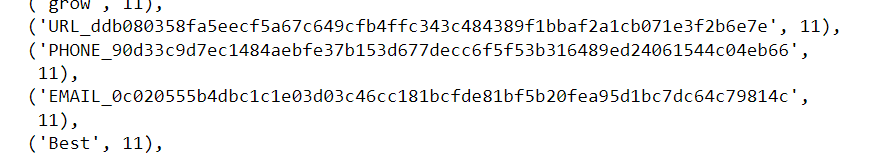

In [45]:
df200['company_profile'] = df200['company_profile'].apply(lambda x: re.sub('URL_[a-zA-z0-9]*', 'INVALID_URL', x)  )
df200['company_profile'] = df200['company_profile'].apply(lambda x: re.sub('EMAIL_[a-zA-z0-9]*', 'INVALID_EMAIL', x)  )
df200['company_profile'] = df200['company_profile'].apply(lambda x: re.sub('PHONE_[a-zA-z0-9]*', 'INVALID_PHONE', x)  )

for i in range(0, len(df200['company_profile'])):
    ex_text = df200['company_profile'][i]
    
    stop_words = stopwords.words('english') #removing stopwords
    word_tokens = word_tokenize(ex_text)   #spliting them into a list
    
    filtered_text = [wnl.lemmatize(x) for x in word_tokens if not x.lower() in stop_words]
    df200['company_profile'][i] = filtered_text
    
    
df200

,company_profile,fraudulent
0,"[Food52, created, groundbreaking, award-winnin...",0
1,"[90, Seconds, world, Cloud, Video, Production,...",0
2,"[Valor, Services, provides, Workforce, Solutio...",0
3,"[passion, improving, quality, life, geography,...",0
4,"[SpotSource, Solutions, LLC, Global, Human, Ca...",0
...,...,...
17875,"[Vend, looking, awesome, new, talent, come, jo...",0
17876,"[WebLinc, e-commerce, platform, service, provi...",0
17877,"[Provide, Full, Time, Permanent, Positions, ma...",0
17878,[unknown_company_profile],0


In [46]:
df201 = df200[df200['fraudulent'] == 1]['company_profile'].reset_index().drop(labels='index', axis=1)

matching_max_dic = {}

for lst in df201['company_profile']:
    for ele in lst:
        if ele in matching_max_dic:
            matching_max_dic[ele] += 1
        else:
            matching_max_dic[ele] = 1
            
key_company_profile = {k:v for (k,v) in matching_max_dic.items()}

 - So from this we have changed that invalid email ID phone number and URL to its proper text so from this there are many occurrence of standard values something like unknown company profile is occurring for 587 times and candidate is occurring for 195 times these are the keywords that our great which are very much responsible for a company profile to be a fraud company profile so this count stays with business like how many weighted keywords can be take some some case say like if it is more than 100 you can take all those keywords some say like if it is 50 you can take all those keywords so as of now we will keep 50 as a band and then we will take all the keywords that are occurring more than 50 times


In [47]:
df201 = df200[df200['fraudulent'] == 0]['company_profile'].reset_index().drop(labels='index', axis=1)

matching_max_dic = {}

for lst in df201['company_profile']:
    for ele in lst:
        if ele in matching_max_dic:
            matching_max_dic[ele] += 1
        else:
            matching_max_dic[ele] = 1
            
Nonkey_company_profile = {k:v for (k,v) in matching_max_dic.items() if v > 100}

#### B. for <u>description</u>

In [48]:
df30 = df0[['description', 'fraudulent']]
df30['description'][192] # keep this verifiying that the url is sometimes not starting with https but always has URL_ in it

'COMPANY OVERVIEW:ChimeNet is a data networking service provider offering innovative information technology (IT) solutions and 24/7/365 support for businesses where data transfer and security cannot be compromised. ChimeNet delivers unsurpassed security, reliability, and cost effectiveness to its healthcare, education, municipal, and other business clients who need to share content-sensitive information, access the Internet securely, and deploy state of the art networking equipment. ChimeNet’s co-location facility supports customer disaster recovery and business continuity planning.By designing, delivering, monitoring, and managing turnkey network security solutions, ChimeNet meets the evolving needs of every client.\xa0 Please go to #URL_e96213b2a38d1186e849460108b9f4f963605c5b0c938d7254e53e405572bd36# for more information.JOB SUMMARY:The Manager, Network Engineering will manage and lead our small team of Network Engineers and serve as the technical subject matter expert.\xa0 The Mana

In [49]:
df30['description'] = df30['description'].apply(lambda x: re.findall("[A-Za-z0-9]*", str(x)))
df30['description'] = df30['description'].apply(lambda x: ' '.join([i for i in x if len(i.strip()) != 0]) )


df30['description'] = df30['description'].apply(lambda x: re.sub('URL_[a-zA-z0-9]*', 'INVALID_URL', str(x))  )
df30['description'] = df30['description'].apply(lambda x: re.sub('EMAIL_[a-zA-z0-9]*', 'INVALID_EMAIL', x)  )
df30['description'] = df30['description'].apply(lambda x: re.sub('PHONE_[a-zA-z0-9]*', 'INVALID_PHONE', x)  )

for i in range(0, len(df30['description'])):
    ex_text = df30['description'][i]
    
    stop_words = stopwords.words('english') #removing stopwords
    word_tokens = word_tokenize(ex_text)   #spliting them into a list
    
    filtered_text = [wnl.lemmatize(x) for x in word_tokens if not x.lower() in stop_words]
    df30['description'][i] = filtered_text
    
    
df301 = df30[df30['fraudulent'] == 1]['description'].reset_index().drop(labels='index', axis=1)

matching_max_dic = {}

for lst in df301['description']:
    for ele in lst:
        if ele in matching_max_dic:
            matching_max_dic[ele] += 1
        else:
            matching_max_dic[ele] = 1
            
key_description = {k:v for (k,v) in matching_max_dic.items()}

In [50]:
df302 = df30[df30['fraudulent'] == 0]['description'].reset_index().drop(labels='index', axis=1)

matching_max_dic = {}

for lst in df302['description']:
    for ele in lst:
        if ele in matching_max_dic:
            matching_max_dic[ele] += 1
        else:
            matching_max_dic[ele] = 1
            
Nonkey_description = {k:v for (k,v) in matching_max_dic.items() if v > 100}

#### C. For <u>requirements</u>

In [51]:
df40 = df0[['requirements', 'fraudulent']]
df40['requirements'][1] # keep this verifiying that the url is sometimes not starting with https but always has URL_ in it

"What we expect from you:Your key responsibility will be to communicate with the client, 90 Seconds team and freelance community throughout the video production process including, shoot planning, securing freelance talent, managing workflow and the online production management system. \xa0The aim is to manage each video project effectively so that we produce great videos that our clients love.Key\xa0attributesClient focused\xa0- excellent customer service and communication skillsOnline -\xa0oustanding computer knowledge and experience using online software and project management toolsOrganised\xa0- manage workload and able to multi-task100% attention to detailMotivated -\xa0self-starter with a passion for doing excellent work and achieving great resultsAdaptable\xa0- show initiative and think on your feet as this is a constantly evolving atmosphereFlexible\xa0- fast turnaround work and after hours availabilityEasy going\xa0&amp; upbeat\xa0- dosen't get bogged down and loves the challen

In [52]:
df40['requirements'] = df40['requirements'].apply(lambda x: re.findall("[A-Za-z0-9]*", str(x)))
df40['requirements'] = df40['requirements'].apply(lambda x: ' '.join([i for i in x if len(i.strip()) != 0]) )

df40['requirements'] = df40['requirements'].apply(lambda x: re.sub('URL_[a-zA-z0-9]*', 'INVALID_URL', str(x))  )
df40['requirements'] = df40['requirements'].apply(lambda x: re.sub('EMAIL_[a-zA-z0-9]*', 'INVALID_EMAIL', x)  )
df40['requirements'] = df40['requirements'].apply(lambda x: re.sub('PHONE_[a-zA-z0-9]*', 'INVALID_PHONE', x)  )

for i in range(0, len(df40['requirements'])):
    ex_text = df40['requirements'][i]
    
    stop_words = stopwords.words('english') #removing stopwords
    word_tokens = word_tokenize(ex_text)   #spliting them into a list
    
    filtered_text = [wnl.lemmatize(x) for x in word_tokens if not x.lower() in stop_words]
    df40['requirements'][i] = filtered_text
    
    
df401 = df40[df40['fraudulent'] == 1]['requirements'].reset_index().drop(labels='index', axis=1)

matching_max_dic = {}

for lst in df401['requirements']:
    for ele in lst:
        if ele in matching_max_dic:
            matching_max_dic[ele] += 1
        else:
            matching_max_dic[ele] = 1
            
key_requirements = {k:v for (k,v) in matching_max_dic.items()}

In [53]:
df401 = df40[df40['fraudulent'] == 0]['requirements'].reset_index().drop(labels='index', axis=1)

matching_max_dic = {}

for lst in df401['requirements']:
    for ele in lst:
        if ele in matching_max_dic:
            matching_max_dic[ele] += 1
        else:
            matching_max_dic[ele] = 1
            
Nonkey_requirements = {k:v for (k,v) in matching_max_dic.items() if v > 100}

#### D. For <u>title</u>

In [54]:
df50 = df0[['title', 'fraudulent']]
df50['title'][1] # keep this verifiying that the url is sometimes not starting with https but always has URL_ in it

'Customer Service - Cloud Video Production'

In [55]:
df50['title'] = df50['title'].apply(lambda x: re.findall("[A-Za-z0-9]*", str(x)))
df50['title'] = df50['title'].apply(lambda x: ' '.join([i for i in x if len(i.strip()) != 0]) )

for i in range(0, len(df50['title'])):
    ex_text = df50['title'][i]
    
    stop_words = stopwords.words('english') #removing stopwords
    word_tokens = word_tokenize(ex_text)   #spliting them into a list
    
    filtered_text = [wnl.lemmatize(x) for x in word_tokens if not x.lower() in stop_words]
    df50['title'][i] = filtered_text
    
    
df501 = df50[df50['fraudulent'] == 1]['title'].reset_index().drop(labels='index', axis=1)

matching_max_dic = {}

for lst in df501['title']:
    for ele in lst:
        if ele in matching_max_dic:
            matching_max_dic[ele] += 1
        else:
            matching_max_dic[ele] = 1
            
key_title = {k:v for (k,v) in matching_max_dic.items()}

In [56]:
df501 = df50[df50['fraudulent'] == 0]['title'].reset_index().drop(labels='index', axis=1)

matching_max_dic = {}

for lst in df501['title']:
    for ele in lst:
        if ele in matching_max_dic:
            matching_max_dic[ele] += 1
        else:
            matching_max_dic[ele] = 1
            
Nonkey_title = {k:v for (k,v) in matching_max_dic.items() if v > 100}

#### E. For <u>location</u>

In [57]:
df60 = df0[['location', 'fraudulent']]
df60['location'][1] # keep this verifiying that the url is sometimes not starting with https but always has URL_ in it

'NZ, , Auckland'

In [58]:
df60['location'] = df60['location'].apply(lambda x: re.findall("[A-Za-z0-9]*", str(x)))
df60['location'] = df60['location'].apply(lambda x: ' '.join([i for i in x if len(i.strip()) != 0]) )

for i in range(0, len(df60['location'])):
    ex_text = df60['location'][i]
    
    stop_words = stopwords.words('english') #removing stopwords
    word_tokens = word_tokenize(ex_text)   #spliting them into a list
    
    filtered_text = [x for x in word_tokens if not x.lower() in stop_words]
    df60['location'][i] = filtered_text
    
    
df601 = df60[df60['fraudulent'] == 1]['location'].reset_index().drop(labels='index', axis=1)

matching_max_dic = {}

for lst in df601['location']:
    for ele in lst:
        if ele in matching_max_dic:
            matching_max_dic[ele] += 1
        else:
            matching_max_dic[ele] = 1
            
key_location = {k:v for (k,v) in matching_max_dic.items()}

In [59]:
df601 = df60[df60['fraudulent'] == 0]['location'].reset_index().drop(labels='index', axis=1)

matching_max_dic = {}

for lst in df601['location']:
    for ele in lst:
        if ele in matching_max_dic:
            matching_max_dic[ele] += 1
        else:
            matching_max_dic[ele] = 1
            
Nonkey_location = {k:v for (k,v) in matching_max_dic.items() if v > 100}

<Axes: title={'center': 'country for Non fraud'}, xlabel='country', ylabel='count'>

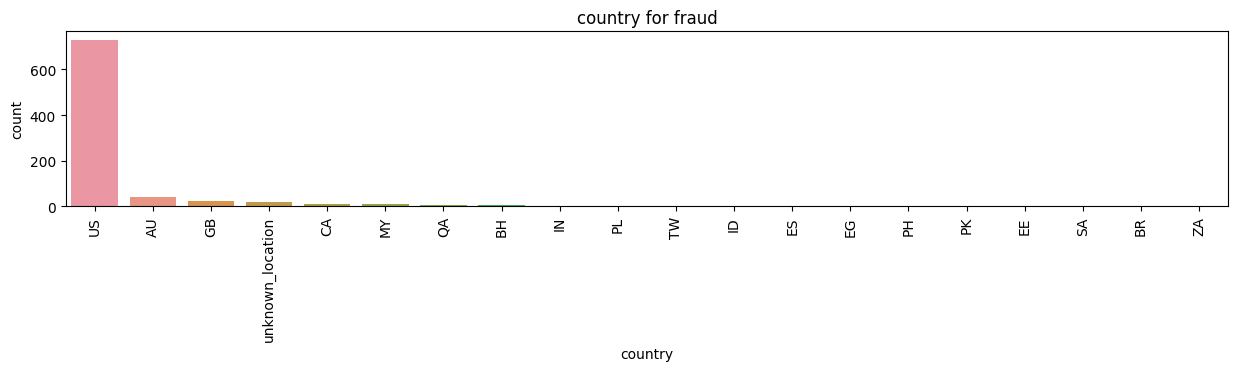

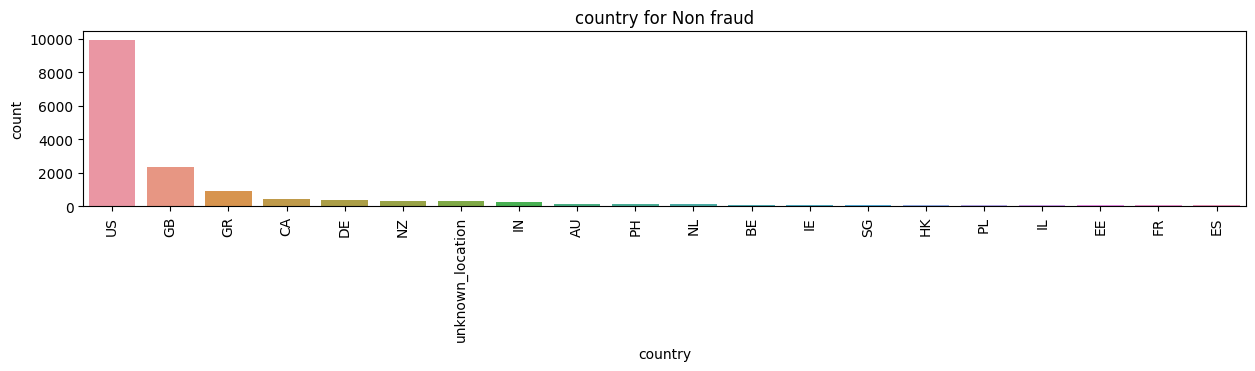

In [60]:
df_x = df0[df0['fraudulent'] == 1][['location']]
x = df_x['location'].str.split(',', expand= True)
df_x['country'] = x[0]
df_x1 = df_x[['country']].groupby(by='country').agg({'country': 'count'}).rename(columns={'country' : 'count'}).reset_index().sort_values(by='count', ascending=False)
df_x1 = df_x1[:20]
plt.figure(figsize=(15, 5))
plt.subplot(2, 1,1)
plt.title('country for fraud')
plt.xticks(rotation=90)
sns.barplot(x =df_x1['country'],y = df_x1['count'])

df_x = df0[df0['fraudulent'] == 0][['location']]
x = df_x['location'].str.split(',', expand= True)
df_x['country'] = x[0]
df_x1 = df_x[['country']].groupby(by='country').agg({'country': 'count'}).rename(columns={'country' : 'count'}).reset_index().sort_values(by='count', ascending=False)
df_x1 = df_x1[:20]
plt.figure(figsize=(15,5))
plt.subplot(2, 1,2)
plt.title('country for Non fraud')
plt.xticks(rotation=90)
sns.barplot(x =df_x1['country'],y = df_x1['count'])


<Axes: title={'center': 'captial for Non fraud'}, xlabel='captial', ylabel='count'>

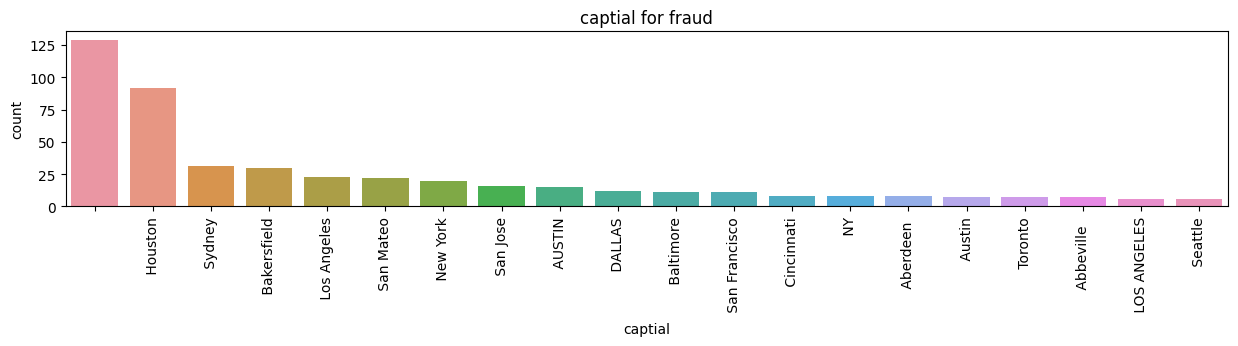

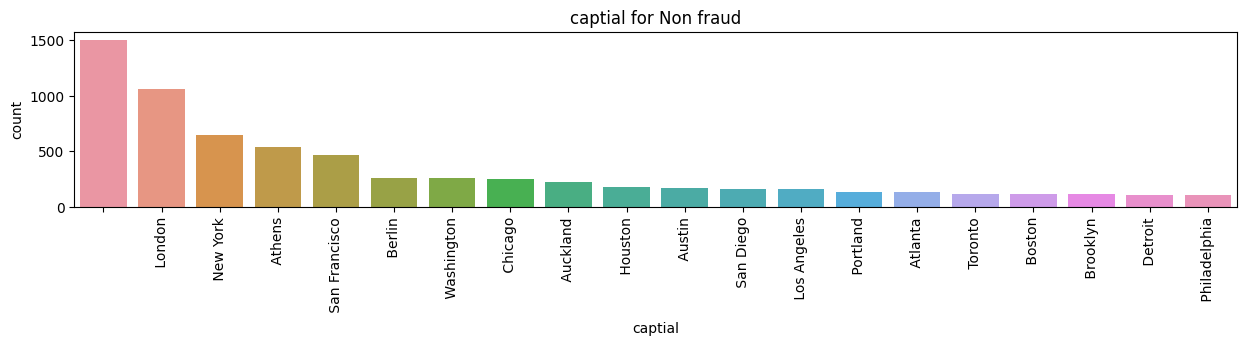

In [61]:
df_x = df0[df0['fraudulent'] == 1][['location']]
x = df_x['location'].str.split(',', expand= True)
df_x['captial'] = x[2]
df_x1 = df_x[['captial']].groupby(by='captial').agg({'captial': 'count'}).rename(columns={'captial' : 'count'}).reset_index().sort_values(by='count', ascending=False)
df_x1 = df_x1[:20]
plt.figure(figsize=(15,5))
plt.subplot(2, 1,1)
plt.title('captial for fraud')
plt.xticks(rotation=90)
sns.barplot(x =df_x1['captial'],y = df_x1['count'])

df_x = df0[df0['fraudulent'] == 0][['location']]
x = df_x['location'].str.split(',', expand= True)
df_x['captial'] = x[2]
df_x1 = df_x[['captial']].groupby(by='captial').agg({'captial': 'count'}).rename(columns={'captial' : 'count'}).reset_index().sort_values(by='count', ascending=False)
df_x1 = df_x1[:20]
plt.figure(figsize=(15,5))
plt.subplot(2, 1,2)
plt.title('captial for Non fraud')
plt.xticks(rotation=90)
sns.barplot(x =df_x1['captial'],y = df_x1['count'])

#### F. For <u>department</u>

In [62]:
df70 = df0[['department', 'fraudulent']]
df70['department'].value_counts() # keep this verifiying that the url is sometimes not starting with https but always has URL_ in it

unknown_department        4903
Sales                     1295
Information Technology    1158
Engineering               1080
Customer Service           990
                          ... 
Program                      1
UX/API                       1
H3rt                         1
U-Verse                      1
Hospitality                  1
Name: department, Length: 1349, dtype: int64

In [63]:
df70['department'] = df70['department'].apply(lambda x: re.findall("[-A-Za-z0-9_/]*", str(x)))
df70['department'] = df70['department'].apply(lambda x: ' '.join([i for i in x if len(i.strip()) != 0]) )

for i in range(0, len(df70['department'])):
    ex_text = df70['department'][i]
    
    stop_words = stopwords.words('english') #removing stopwords
    word_tokens = word_tokenize(ex_text)   #spliting them into a list
    
    filtered_text = [wnl.lemmatize(x) for x in word_tokens if not x.lower() in stop_words]
    df70['department'][i] = filtered_text
    
    
df701 = df70[df70['fraudulent'] == 1]['department'].reset_index().drop(labels='index', axis=1)

matching_max_dic = {}

for lst in df701['department']:
    for ele in lst:
        if ele in matching_max_dic:
            matching_max_dic[ele] += 1
        else:
            matching_max_dic[ele] = 1
            
key_department = {k:v for (k,v) in matching_max_dic.items()}

In [64]:
df702 = df70[df70['fraudulent'] == 0]['department'].reset_index().drop(labels='index', axis=1)

matching_max_dic = {}

for lst in df702['department']:
    for ele in lst:
        if ele in matching_max_dic:
            matching_max_dic[ele] += 1
        else:
            matching_max_dic[ele] = 1
            
Nonkey_department = {k:v for (k,v) in matching_max_dic.items() if v > 10}

#### G. For <u>salary_range</u>

In [65]:
df80 = df0[['salary_range', 'fraudulent']]
df80['salary_range'].value_counts() # keep this verifiying that the url is sometimes not starting with https but always has URL_ in it

unknown_salary    6023
17500             5195
2500              3292
0                 3268
5000                42
12500               22
15000               18
7500                17
10000                3
Name: salary_range, dtype: int64

In [66]:
df801 = df80[df80['fraudulent'] == 1]['salary_range'].reset_index().drop(labels='index', axis=1)

matching_max_dic = {}

for ele in df801['salary_range']:
    if ele in matching_max_dic:
        matching_max_dic[ele] += 1
    else:
        matching_max_dic[ele] = 1
            
key_salary_range = {k:v for (k,v) in matching_max_dic.items() }
key_salary_range

{17500: 294,
 'unknown_salary': 338,
 0: 102,
 2500: 118,
 5000: 9,
 7500: 4,
 12500: 1}

In [67]:
df802 = df80[df80['fraudulent'] == 0]['salary_range'].reset_index().drop(labels='index', axis=1)

matching_max_dic = {}

for ele in df802['salary_range']:
    if ele in matching_max_dic:
        matching_max_dic[ele] += 1
    else:
        matching_max_dic[ele] = 1
            
Nonkey_salary_range = {k:v for (k,v) in matching_max_dic.items()}
Nonkey_salary_range

{2500: 3174,
 0: 3166,
 'unknown_salary': 5685,
 17500: 4901,
 15000: 18,
 12500: 21,
 7500: 13,
 10000: 3,
 5000: 33}

<Axes: title={'center': 'salary_range for Non fraud'}>

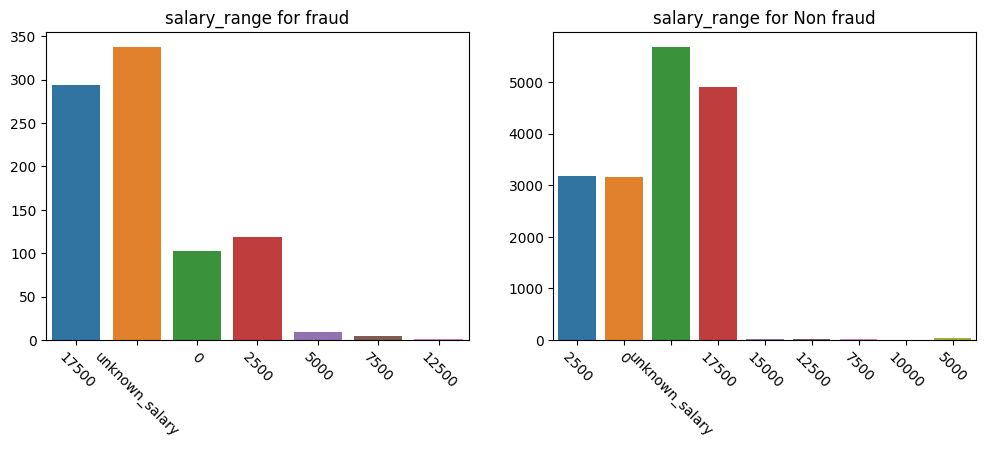

In [68]:
plt.figure(figsize=(12,4))
plt.subplot(1, 2,1)
plt.title('salary_range for fraud')
sns.barplot(pd.DataFrame(key_salary_range, index=[x for x in range (0,len(key_salary_range))]))
plt.xticks(rotation=-45)

plt.subplot(1, 2, 2)
plt.title('salary_range for Non fraud')
plt.xticks(rotation=-45)
sns.barplot(pd.DataFrame(Nonkey_salary_range, index=[x for x in range(0,len(Nonkey_salary_range))]))

#### H. For <u>benifits</u>

In [69]:
df0['benefits'] = df0['benefits'].apply(lambda x : 'unknown_benefits' if x == '0    1\nName: benefits, dtype: int64' else x)

In [70]:
df90 = df0[['benefits', 'fraudulent']]
df90['benefits'].value_counts() # keep this verifiying that the url is sometimes not starting with https but always has URL_ in it

unknown_benefits                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            7210
See job description                                                                                                                                                                                                                                                                                                                                                                                                                    

In [71]:
df90['benefits'] = df90['benefits'].apply(lambda x: re.findall("[-A-Za-z0-9_/]*", str(x)))
df90['benefits'] = df90['benefits'].apply(lambda x: ' '.join([i for i in x if len(i.strip()) != 0]) )

df90['benefits'] = df90['benefits'].apply(lambda x: re.sub('URL_[a-zA-z0-9]*', 'INVALID_URL', str(x))  )
df90['benefits'] = df90['benefits'].apply(lambda x: re.sub('EMAIL_[a-zA-z0-9]*', 'INVALID_EMAIL', x)  )
df90['benefits'] = df90['benefits'].apply(lambda x: re.sub('PHONE_[a-zA-z0-9]*', 'INVALID_PHONE', x)  )


for i in range(0, len(df90['benefits'])):
    ex_text = df90['benefits'][i]
    
    stop_words = stopwords.words('english') #removing stopwords
    word_tokens = word_tokenize(ex_text)   #spliting them into a list
    
    filtered_text = [wnl.lemmatize(x) for x in word_tokens if not x.lower() in stop_words]
    df90['benefits'][i] = filtered_text
    
    
df901 = df90[df90['fraudulent'] == 1]['benefits'].reset_index().drop(labels='index', axis=1)

matching_max_dic = {}

for lst in df901['benefits']:
    for ele in lst:
        if ele in matching_max_dic:
            matching_max_dic[ele] += 1
        else:
            matching_max_dic[ele] = 1
            
key_benefits = {k:v for (k,v) in matching_max_dic.items()}

In [72]:
df902 = df90[df90['fraudulent'] == 1]['benefits'].reset_index().drop(labels='index', axis=1)

matching_max_dic = {}

for lst in df902['benefits']:
    for ele in lst:
        if ele in matching_max_dic:
            matching_max_dic[ele] += 1
        else:
            matching_max_dic[ele] = 1
            
Nonkey_benefits = {k:v for (k,v) in matching_max_dic.items() if v > 10}

#### I. For <u>employment_type</u>

In [73]:
df91 = df0[['employment_type', 'fraudulent']]
df91['employment_type'].value_counts() # keep this verifiying that the url is sometimes not starting with https but always has URL_ in it

Full-time                  11864
unknown_employment_type     3227
Contract                    1524
Part-time                    797
Temporary                    241
Other                        227
Name: employment_type, dtype: int64

In [74]:
df911 = df91[df91['fraudulent'] == 1]['employment_type'].reset_index().drop(labels='index', axis=1)

matching_max_dic = {}

for ele in df911['employment_type']:
    if ele in matching_max_dic:
        matching_max_dic[ele] += 1
    else:
        matching_max_dic[ele] = 1
            
key_employee_type = {k:v for (k,v) in matching_max_dic.items()}
key_employee_type

{'Full-time': 511,
 'unknown_employment_type': 220,
 'Contract': 44,
 'Other': 15,
 'Part-time': 74,
 'Temporary': 2}

In [75]:
df912 = df91[df91['fraudulent'] == 0]['employment_type'].reset_index().drop(labels='index', axis=1)

matching_max_dic = {}

for ele in df912['employment_type']:
    if ele in matching_max_dic:
        matching_max_dic[ele] += 1
    else:
        matching_max_dic[ele] = 1
            
Nonkey_employee_type = {k:v for (k,v) in matching_max_dic.items()}
Nonkey_employee_type

{'Other': 212,
 'Full-time': 11353,
 'unknown_employment_type': 3007,
 'Part-time': 723,
 'Contract': 1480,
 'Temporary': 239}

<Axes: title={'center': 'Nonkey_employee_type for Non fraud'}>

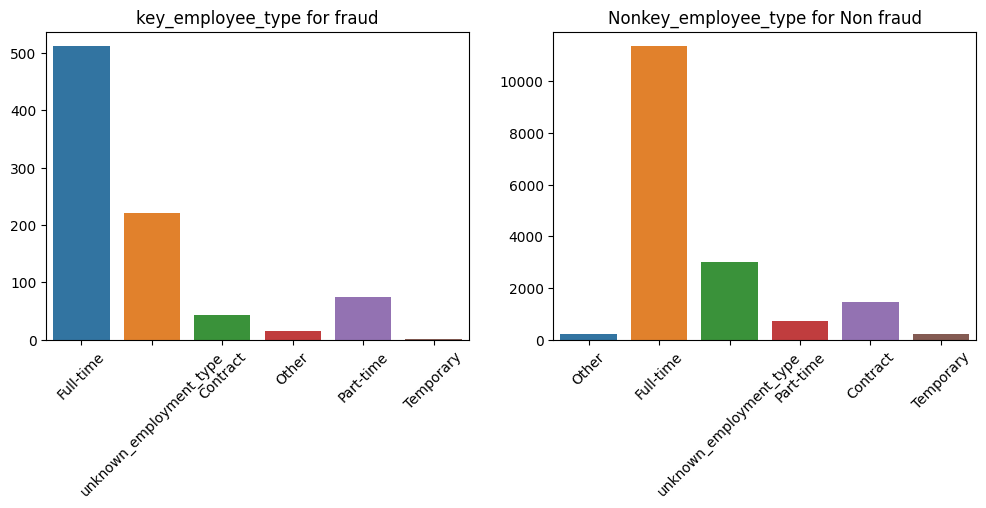

In [76]:
plt.figure(figsize=(12,4))
plt.subplot(1, 2,1)
plt.title('key_employee_type for fraud')
sns.barplot(pd.DataFrame(key_employee_type, index=[x for x in range (0,len(key_employee_type))]))
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
plt.title('Nonkey_employee_type for Non fraud')
plt.xticks(rotation=45)
sns.barplot(pd.DataFrame(Nonkey_employee_type, index=[x for x in range(0,len(Nonkey_employee_type))]))

#### J. For <u>required_experiences</u>

In [77]:
df92 = df0[['required_experience', 'fraudulent']]

In [78]:
df921 = df92[df92['fraudulent'] == 1]['required_experience'].reset_index().drop(labels='index', axis=1)

matching_max_dic = {}

for ele in df921['required_experience']:
    if ele in matching_max_dic:
        matching_max_dic[ele] += 1
    else:
        matching_max_dic[ele] = 1
            
key_required_experience = {k:v for (k,v) in matching_max_dic.items()}
key_required_experience

{'Mid-Senior level': 271,
 'unknown_required_experience': 219,
 'Associate': 42,
 'Entry level': 234,
 'Executive': 10,
 'Internship': 11,
 'Director': 17,
 'Not Applicable': 62}

In [79]:
df922 = df92[df92['fraudulent'] == 0]['required_experience'].reset_index().drop(labels='index', axis=1)

matching_max_dic = {}

for ele in df922['required_experience']:
    if ele in matching_max_dic:
        matching_max_dic[ele] += 1
    else:
        matching_max_dic[ele] = 1
            
Nonkey_required_experience = {k:v for (k,v) in matching_max_dic.items() }
Nonkey_required_experience

{'Internship': 430,
 'Not Applicable': 1069,
 'unknown_required_experience': 2952,
 'Mid-Senior level': 7003,
 'Associate': 2336,
 'Entry level': 2721,
 'Executive': 131,
 'Director': 372}

<Axes: title={'center': 'Nonkey_required_experience for Non fraud'}>

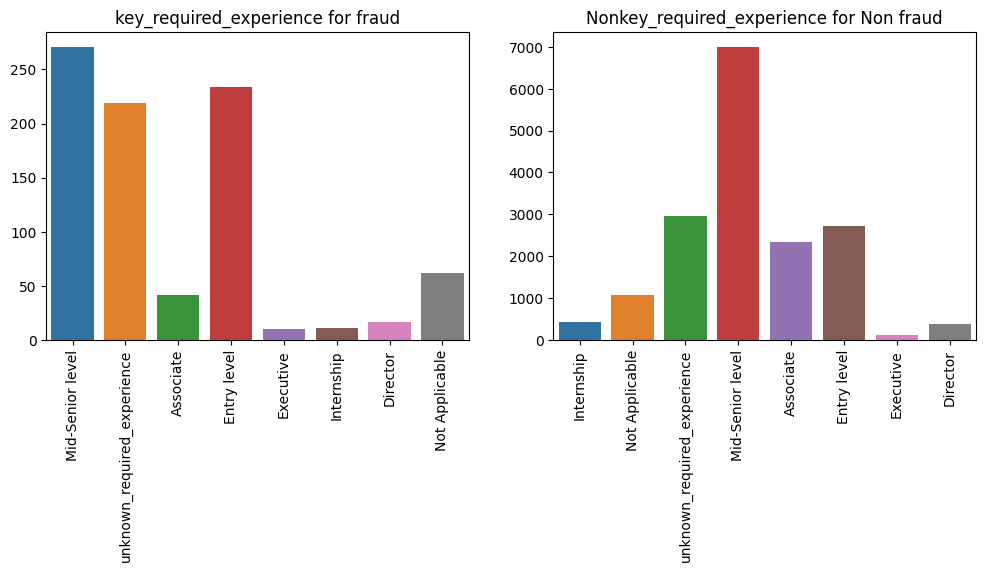

In [80]:
plt.figure(figsize=(12,4))
plt.subplot(1, 2,1)
plt.title('key_required_experience for fraud')
sns.barplot(pd.DataFrame(key_required_experience, index=[x for x in range (0,len(key_required_experience))]))
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
plt.title('Nonkey_required_experience for Non fraud')
plt.xticks(rotation=90)
sns.barplot(pd.DataFrame(Nonkey_required_experience, index=[x for x in range(0,len(Nonkey_required_experience))]))

#### K. For <u>required_education</u>

In [81]:
df93 = df0[['required_education', 'fraudulent']]

df931 = df93[df93['fraudulent'] == 1]['required_education'].reset_index().drop(labels='index', axis=1)

matching_max_dic = {}

for ele in df931['required_education']:
    if ele in matching_max_dic:
        matching_max_dic[ele] += 1
    else:
        matching_max_dic[ele] = 1
            
key_required_education = {k:v for (k,v) in matching_max_dic.items()}
key_required_education

{'High School or equivalent': 218,
 'unknown_required_education': 220,
 'Certification': 19,
 "Bachelor's Degree": 283,
 'Unspecified': 61,
 "Master's Degree": 31,
 'Professional': 4,
 'Associate Degree': 6,
 'Some College Coursework Completed': 3,
 'Some High School Coursework': 20,
 'Doctorate': 1}

In [82]:
df932 = df93[df93['fraudulent'] == 0]['required_education'].reset_index().drop(labels='index', axis=1)

matching_max_dic = {}

for ele in df932['required_education']:
    if ele in matching_max_dic:
        matching_max_dic[ele] += 1
    else:
        matching_max_dic[ele] = 1
            
Nonkey_required_education = {k:v for (k,v) in matching_max_dic.items()}
Nonkey_required_education

{"Bachelor's Degree": 9393,
 'unknown_required_education': 3007,
 "Master's Degree": 385,
 'High School or equivalent': 2122,
 'Unspecified': 1423,
 'Some College Coursework Completed': 99,
 'Vocational': 49,
 'Certification': 151,
 'Associate Degree': 268,
 'Professional': 70,
 'Doctorate': 25,
 'Some High School Coursework': 7,
 'Vocational - Degree': 6,
 'Vocational - HS Diploma': 9}

<Axes: title={'center': 'Nonkey_required_education for Non fraud'}>

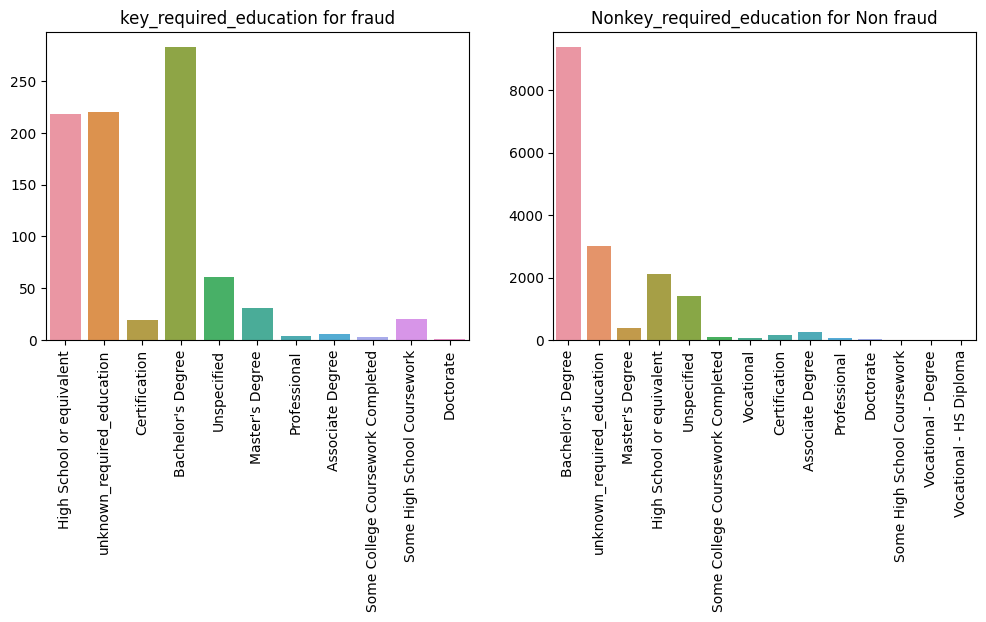

In [83]:
plt.figure(figsize=(12,4))
plt.subplot(1, 2,1)
plt.title('key_required_education for fraud')
sns.barplot(pd.DataFrame(key_required_education, index=[x for x in range (0,len(key_required_education))]))
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
plt.title('Nonkey_required_education for Non fraud')
plt.xticks(rotation=90)
sns.barplot(pd.DataFrame(Nonkey_required_education, index=[x for x in range(0,len(Nonkey_required_education))]))

#### L. For <u>Industory</u>

In [84]:
df94 = df0[['industry', 'fraudulent']]
df94['industry'].value_counts() # keep this verifiying that the url is sometimes not starting with https but always has URL_ in it

unknown_industry                       4903
Information Technology and Services    1734
Computer Software                      1376
Internet                               1062
Marketing and Advertising               828
                                       ... 
Shipbuilding                              1
Sporting Goods                            1
Museums and Institutions                  1
Wine and Spirits                          1
Ranching                                  1
Name: industry, Length: 132, dtype: int64

In [85]:
df941 = df94[df94['fraudulent'] == 1]['industry'].reset_index().drop(labels='index', axis=1)

matching_max_dic = {}

for ele in df941['industry']:
    if ele in matching_max_dic:
        matching_max_dic[ele] += 1
    else:
        matching_max_dic[ele] = 1
            
key_industry = {k:v for (k,v) in matching_max_dic.items() }

In [86]:
df942 = df94[df94['fraudulent'] == 0]['industry'].reset_index().drop(labels='index', axis=1)

matching_max_dic = {}

for ele in df942['industry']:
    if ele in matching_max_dic:
        matching_max_dic[ele] += 1
    else:
        matching_max_dic[ele] = 1
            
Nonkey_industry = {k:v for (k,v) in matching_max_dic.items() }

#### M. For <u>function</u>

In [87]:
df95 = df0[['function', 'fraudulent']]
df95['function'].value_counts() # keep this verifiying that the url is sometimes not starting with https but always has URL_ in it

unknown_function          4903
Information Technology    1766
Sales                     1531
Engineering               1371
Customer Service          1239
                          ... 
Marketing Intern             1
migrations                   1
Holiday Inn & Suites         1
Transport                    1
Hospitality                  1
Name: function, Length: 599, dtype: int64

In [88]:
df951 = df95[df95['fraudulent'] == 1]['function'].reset_index().drop(labels='index', axis=1)

matching_max_dic = {}

for ele in df951['function']:
    if ele in matching_max_dic:
        matching_max_dic[ele] += 1
    else:
        matching_max_dic[ele] = 1
            
key_function = {k:v for (k,v) in matching_max_dic.items() }

In [89]:
df952 = df95[df95['fraudulent'] == 0]['function'].reset_index().drop(labels='index', axis=1)

matching_max_dic = {}

for ele in df952['function']:
    if ele in matching_max_dic:
        matching_max_dic[ele] += 1
    else:
        matching_max_dic[ele] = 1
            
Nonkey_function = {k:v for (k,v) in matching_max_dic.items() }

No me have found all the important keys that are very much responsible for fraud description and non fraud description according to their occurrences number of occurrences so that if those keywords aren't matching keywords from fraud description and keywords from non fraud description are not matching so we can deliberately say that if these keywords from are coming and then v can say that it is a fraud or non fraud description in the other case if those keywords are like overlapping each other like some common keywords that are present in both the cases then we can find their absolute probability vidya account and then give them a mass according to it if a keyword is present 50 then the density of that keyword will be 0.5 so likewise we will give all these densities to all the keywords and then will overlap each other and then find which are all key elements that are present in that test data and then according to this mass will valuate them and then find out the total mass of the test data that is given and then we will know that how much probability that this data is a fraud or non fraud


#### N. For <u>telecommuting</u>

In [90]:
df96 = df0[['telecommuting', 'fraudulent']]
df96['telecommuting'].value_counts() # keep this verifiying that the url is sometimes not starting with https but always has URL_ in it

0    17113
1      767
Name: telecommuting, dtype: int64

In [91]:
df961 = df96[df96['fraudulent'] == 1]['telecommuting'].reset_index().drop(labels='index', axis=1)

matching_max_dic = {}

for ele in df961['telecommuting']:
    if ele in matching_max_dic:
        matching_max_dic[ele] += 1
    else:
        matching_max_dic[ele] = 1
            
key_telecommuting = {k:v for (k,v) in matching_max_dic.items()}

In [92]:
df962 = df96[df96['fraudulent'] == 0]['telecommuting'].reset_index().drop(labels='index', axis=1)

matching_max_dic = {}

for ele in df962['telecommuting']:
    if ele in matching_max_dic:
        matching_max_dic[ele] += 1
    else:
        matching_max_dic[ele] = 1
            
Nonkey_telecommuting = {k:v for (k,v) in matching_max_dic.items()}
Nonkey_telecommuting

{0: 16311, 1: 703}

<Axes: title={'center': 'key_telecommuting for fraud vs nonfraud'}, xlabel='telecommuting', ylabel='count'>

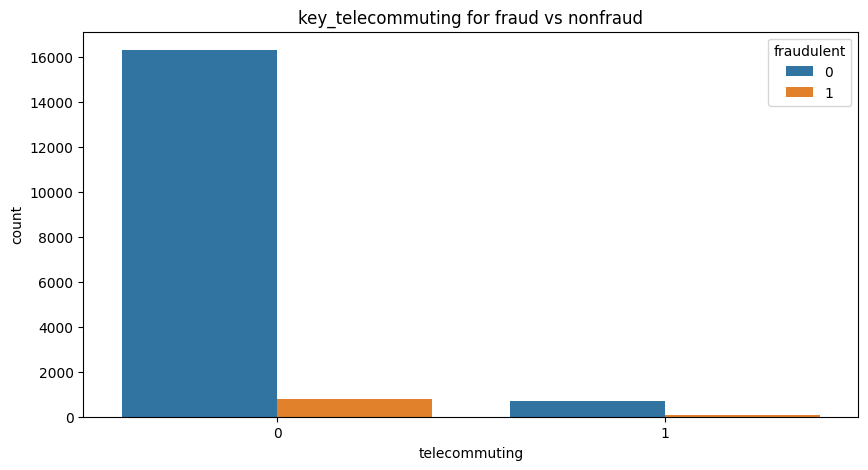

In [93]:
df_x = df0[['telecommuting', 'fraudulent']]
df_x = df_x.groupby(by=['telecommuting', 'fraudulent']).agg({'fraudulent':'count'}).rename(columns={'fraudulent': 'count'}).reset_index()
plt.figure(figsize=(10,5))
plt.title('key_telecommuting for fraud vs nonfraud')
sns.barplot(df_x, x ='telecommuting', y='count', hue='fraudulent')


#### O. For <u>has_company_logo</u>

In [94]:
df97 = df0[['has_company_logo', 'fraudulent']]
df97['has_company_logo'].value_counts() # keep this verifiying that the url is sometimes not starting with https but always has URL_ in it

1    14220
0     3660
Name: has_company_logo, dtype: int64

In [95]:
df971 = df97[df97['fraudulent'] == 1]['has_company_logo'].reset_index().drop(labels='index', axis=1)

matching_max_dic = {}

for ele in df971['has_company_logo']:
    if ele in matching_max_dic:
        matching_max_dic[ele] += 1
    else:
        matching_max_dic[ele] = 1
            
key_has_company_logo = {k:v for (k,v) in matching_max_dic.items()}
key_has_company_logo

{1: 283, 0: 583}

In [96]:
df972 = df97[df97['fraudulent'] == 0]['has_company_logo'].reset_index().drop(labels='index', axis=1)

matching_max_dic = {}

for ele in df972['has_company_logo']:
    if ele in matching_max_dic:
        matching_max_dic[ele] += 1
    else:
        matching_max_dic[ele] = 1
            
Nonkey_has_company_logo = {k:v for (k,v) in matching_max_dic.items()}
Nonkey_has_company_logo

{1: 13937, 0: 3077}

<Axes: title={'center': 'has_company_logo for fraud vs nonfraud'}, xlabel='has_company_logo', ylabel='count'>

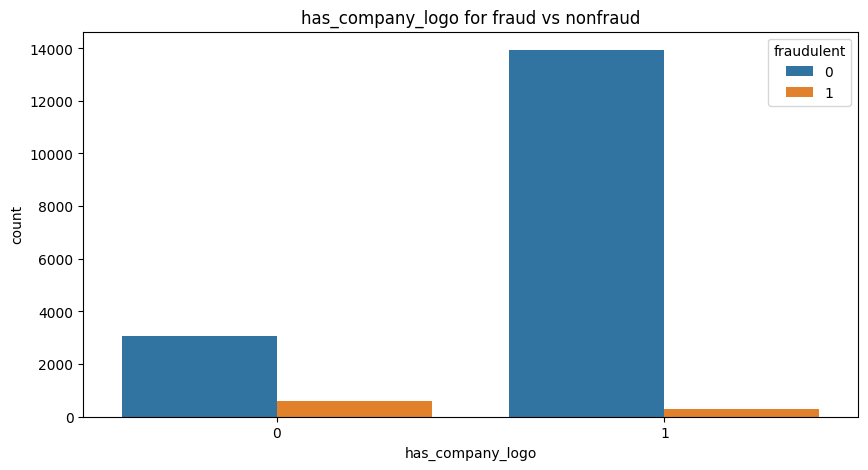

In [97]:
df_x = df0[['has_company_logo', 'fraudulent']]
df_x = df_x.groupby(by=['has_company_logo', 'fraudulent']).agg({'fraudulent':'count'}).rename(columns={'fraudulent': 'count'}).reset_index()
plt.figure(figsize=(10,5))
plt.title('has_company_logo for fraud vs nonfraud')
sns.barplot(df_x, x ='has_company_logo', y='count', hue='fraudulent')

#### P. For <u>has_questions</u>

In [98]:
df98 = df0[['has_questions', 'fraudulent']]
df98['has_questions'].value_counts() # keep this verifiying that the url is sometimes not starting with https but always has URL_ in it

0    9088
1    8792
Name: has_questions, dtype: int64

In [99]:
df981 = df98[df98['fraudulent'] == 1]['has_questions'].reset_index().drop(labels='index', axis=1)

matching_max_dic = {}

for ele in df981['has_questions']:
    if ele in matching_max_dic:
        matching_max_dic[ele] += 1
    else:
        matching_max_dic[ele] = 1
            
key_has_questions = {k:v for (k,v) in matching_max_dic.items()}
key_has_questions

{1: 250, 0: 616}

In [100]:
df982 = df98[df98['fraudulent'] == 0]['has_questions'].reset_index().drop(labels='index', axis=1)

matching_max_dic = {}

for ele in df982['has_questions']:
    if ele in matching_max_dic:
        matching_max_dic[ele] += 1
    else:
        matching_max_dic[ele] = 1
            
Nonkey_has_questions = {k:v for (k,v) in matching_max_dic.items()}
Nonkey_has_questions

{0: 8472, 1: 8542}

<Axes: title={'center': 'has_questions for fraud vs nonfraud'}, xlabel='has_questions', ylabel='count'>

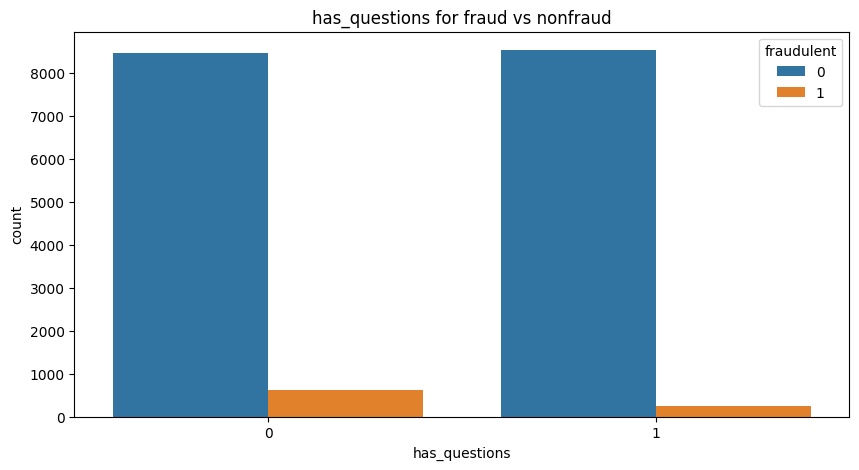

In [101]:
df_x = df0[['has_questions', 'fraudulent']]
df_x = df_x.groupby(by=['has_questions', 'fraudulent']).agg({'fraudulent':'count'}).rename(columns={'fraudulent': 'count'}).reset_index()
plt.figure(figsize=(10,5))
plt.title('has_questions for fraud vs nonfraud')
sns.barplot(df_x, x ='has_questions', y='count', hue='fraudulent')

Text(50.722222222222214, 0.5, 'telecommuting | has_company_logo | has_questions')

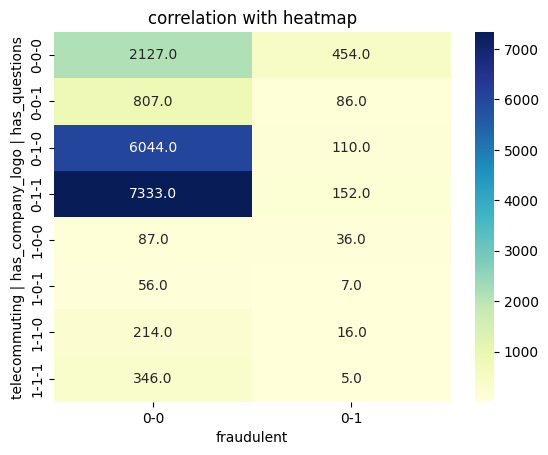

In [102]:
dfx = df0[['telecommuting', 'has_company_logo', 'has_questions','fraudulent']]
dfx = dfx.groupby(by=['telecommuting', 'has_company_logo', 'has_questions','fraudulent']).value_counts().reset_index()
dfx = dfx.pivot(index= ['telecommuting', 'has_company_logo', 'has_questions'], columns= ['fraudulent'])
sns.heatmap(dfx, cmap="YlGnBu", annot=True, fmt='.1f')
plt.title('correlation with heatmap')
plt.xlabel('fraudulent')
plt.ylabel('telecommuting | has_company_logo | has_questions')

 - From this we come to see that if telecommunication is 0 has company is 1 has questions is 1 then that to be non fraud is high similar way if we have all the cases zero then it to be fraud is high with 454 count

###

## 3. <u>Custom Weighted Modeling</u> : Preprocessing Data

Now we are using a custom weighted model so we have now 16 columns with their occurrences number of occurrences is in a dictionary format so lets say we have in a column called benefits so we have a word called ""offered"'' so that is repeating for 22 times and we are custom waiting the keys based on the total sum versus their own country which means will calculate the overall sum of the counts let's say this key benefits is giving up something in relax and then this for the weight of this offered keyboard will be 22/ 17019 which will be mirror 0.00129  so will be estimating all these weights to this particular fraud and non fraud keywords and then we will save this for testing the data will get all the 16 column values and then we will again compare that keywords with this keywords dictionary that we have got till now and then we will add this custom weighted some and then will calculate the overall sum of this custom weighted and then we will compare for fraud and non fraud both individually so if the sum of fraud is greater than sum of non fraud so we will declare that we have a total occurrence that count of weighted model that to be fraud is greater than non fraud

#### 3.1 benefits : 

In [103]:
f_benefits_sum = sum(key_benefits[i] for i in key_benefits)
nf_benefits_sum = sum(Nonkey_benefits[i] for i in Nonkey_benefits)
    
print("benefits sum's: ",f_benefits_sum, nf_benefits_sum)

wf_benefits = {k:(v/f_benefits_sum) for (k,v) in key_benefits.items()}
wnf_benefits = {k:(v/nf_benefits_sum) for (k,v) in Nonkey_benefits.items()}

benefits sum's:  17019 12305


#### 3.2 company_profile

In [104]:
f_company_profile_sum = sum(key_company_profile[i] for i in key_company_profile)
nf_company_profile_sum = sum(Nonkey_company_profile[i] for i in Nonkey_company_profile)
    
print("company_profile sum's: ",f_company_profile_sum, nf_company_profile_sum)

wf_company_profile = {k:(v/f_company_profile_sum) for (k,v) in key_company_profile.items()}
wnf_company_profile = {k:(v/nf_company_profile_sum) for (k,v) in Nonkey_company_profile.items()}

company_profile sum's:  18443 789218


#### 3.3 department

In [105]:
f_department_sum = sum(key_department[i] for i in key_department)
nf_department_sum = sum(Nonkey_department[i] for i in Nonkey_department)
    
print("department sum's: ",f_department_sum, nf_department_sum)

wf_department = {k:(v/f_department_sum) for (k,v) in key_department.items()}
wnf_department = {k:(v/nf_department_sum) for (k,v) in Nonkey_department.items()}

department sum's:  1100 19736


#### 3.4 description

In [106]:
f_description_sum = sum(key_description[i] for i in key_description)
nf_description_sum = sum(Nonkey_description[i] for i in Nonkey_description)
    
print("description sum's: ",f_description_sum, nf_description_sum)

wf_description = {k:(v/f_description_sum) for (k,v) in key_description.items()}
wnf_description = {k:(v/nf_description_sum) for (k,v) in Nonkey_description.items()}

description sum's:  95014 1550727


#### 3.5 employee_type

In [107]:
f_employee_type_sum = sum(key_employee_type[i] for i in key_employee_type)
nf_employee_type_sum = sum(Nonkey_employee_type[i] for i in Nonkey_employee_type)
    
print("employee_type sum's: ",f_employee_type_sum, nf_employee_type_sum)

wf_employee_type = {k:(v/f_employee_type_sum) for (k,v) in key_employee_type.items()}
wnf_employee_type = {k:(v/nf_employee_type_sum) for (k,v) in Nonkey_employee_type.items()}

employee_type sum's:  866 17014


#### 3.6 function

In [108]:
f_function_sum = sum(key_function[i] for i in key_function)
nf_function_sum = sum(Nonkey_function[i] for i in Nonkey_function)
    
print("function sum's: ",f_function_sum, nf_function_sum)

wf_function = {k:(v/f_function_sum) for (k,v) in key_function.items()}
wnf_function = {k:(v/nf_function_sum) for (k,v) in Nonkey_function.items()}

function sum's:  866 17014


#### 3.7 has_company_logo

In [109]:
f_has_company_logo_sum = sum(key_has_company_logo[i] for i in key_has_company_logo)
nf_has_company_logo_sum = sum(Nonkey_has_company_logo[i] for i in Nonkey_has_company_logo)
    
print("has_company_logo sum's: ",f_has_company_logo_sum, nf_has_company_logo_sum)

wf_has_company_logo = {k:(v/f_has_company_logo_sum) for (k,v) in key_has_company_logo.items()}
wnf_has_company_logo = {k:(v/nf_has_company_logo_sum) for (k,v) in Nonkey_has_company_logo.items()}

has_company_logo sum's:  866 17014


#### 3.8 has_quwstions

In [110]:
f_has_questions_sum = sum(key_has_questions[i] for i in key_has_questions)
nf_has_questions_sum = sum(Nonkey_has_questions[i] for i in Nonkey_has_questions)
    
print("has_questions sum's: ",f_has_questions_sum, nf_has_questions_sum)

wf_has_questions = {k:(v/f_has_questions_sum) for (k,v) in key_has_questions.items()}
wnf_has_questions = {k:(v/nf_has_questions_sum) for (k,v) in Nonkey_has_questions.items()}

has_questions sum's:  866 17014


#### 3.9 industry

In [111]:
f_industry_sum = sum(key_industry[i] for i in key_industry)
nf_industry_sum = sum(Nonkey_industry[i] for i in Nonkey_industry)
    
print("industry sum's: ",f_industry_sum, nf_industry_sum)

wf_industry = {k:(v/f_industry_sum) for (k,v) in key_industry.items()}
wnf_industry = {k:(v/nf_industry_sum) for (k,v) in Nonkey_industry.items()}

industry sum's:  866 17014


#### 3.10 location

In [112]:
f_location_sum = sum(key_location[i] for i in key_location)
nf_location_sum = sum(Nonkey_location[i] for i in Nonkey_location)
    
print("location sum's: ",f_location_sum, nf_location_sum)

wf_location = {k:(v/f_location_sum) for (k,v) in key_location.items()}
wnf_location = {k:(v/nf_location_sum) for (k,v) in Nonkey_location.items()}

location sum's:  2550 33677


#### 3.11 required_education

In [113]:
f_required_education_sum = sum(key_required_education[i] for i in key_required_education)
nf_required_education_sum = sum(Nonkey_required_education[i] for i in Nonkey_required_education)
    
print("required_education sum's: ",f_required_education_sum, nf_required_education_sum)

wf_required_education = {k:(v/f_required_education_sum) for (k,v) in key_required_education.items()}
wnf_required_education = {k:(v/nf_required_education_sum) for (k,v) in Nonkey_required_education.items()}

required_education sum's:  866 17014


#### 3.12 required_experience

In [114]:
f_required_experience_sum = sum(key_required_experience[i] for i in key_required_experience)
nf_required_experience_sum = sum(Nonkey_required_experience[i] for i in Nonkey_required_experience)
    
print("required_experience sum's: ",f_required_experience_sum, nf_required_experience_sum)

wf_required_experience = {k:(v/f_required_experience_sum) for (k,v) in key_required_experience.items()}
wnf_required_experience = {k:(v/nf_required_experience_sum) for (k,v) in Nonkey_required_experience.items()}

required_experience sum's:  866 17014


#### 3.13 requirements

In [115]:
f_requirements_sum = sum(key_requirements[i] for i in key_requirements)
nf_requirements_sum = sum(Nonkey_requirements[i] for i in Nonkey_requirements)
    
print("requirements sum's: ",f_requirements_sum, nf_requirements_sum)

wf_requirements = {k:(v/f_requirements_sum) for (k,v) in key_requirements.items()}
wnf_requirements = {k:(v/nf_requirements_sum) for (k,v) in Nonkey_requirements.items()}

requirements sum's:  37644 718718


#### 3.14 salary_range

In [116]:
f_salary_range_sum = sum(key_salary_range[i] for i in key_salary_range)
nf_salary_range_sum = sum(Nonkey_salary_range[i] for i in Nonkey_salary_range)
    
print("salary_range sum's: ",f_salary_range_sum, nf_salary_range_sum)

wf_salary_range = {k:(v/f_salary_range_sum) for (k,v) in key_salary_range.items()}
wnf_salary_range = {k:(v/nf_salary_range_sum) for (k,v) in Nonkey_salary_range.items()}

salary_range sum's:  866 17014


#### 3.15 telecommuting

In [117]:
f_telecommuting_sum = sum(key_telecommuting[i] for i in key_telecommuting)
nf_telecommuting_sum = sum(Nonkey_telecommuting[i] for i in Nonkey_telecommuting)
    
print("telecommuting sum's: ",f_telecommuting_sum, nf_telecommuting_sum)

wf_telecommuting = {k:(v/f_telecommuting_sum) for (k,v) in key_telecommuting.items()}
wnf_telecommuting = {k:(v/nf_telecommuting_sum) for (k,v) in Nonkey_telecommuting.items()}

telecommuting sum's:  866 17014


#### 3.16 title

In [118]:
f_title_sum = sum(key_title[i] for i in key_title)
nf_title_sum = sum(Nonkey_title[i] for i in Nonkey_title)
    
print("title sum's: ",f_title_sum, nf_title_sum)

wf_title = {k:(v/f_title_sum) for (k,v) in key_title.items()}
wnf_title = {k:(v/nf_title_sum) for (k,v) in Nonkey_title.items()}

title sum's:  3395 32057


##

## 4. Testing

In [119]:
test = data[17000:]
test.to_csv('test_data.csv', header=True, index=False)

In [120]:
test_sample = pd.read_csv('test_data.csv') 

test_sample[['weight_fraud', 'weight_non_fraud']] = [0, 0]
test_sample['department'].fillna('unknown_department', inplace=True)
test_sample['benefits'].fillna('unknown_benefits', inplace=True)
test_sample['function'].fillna('unknown_function', inplace=True)
test_sample['industry'].fillna('unknown_industry', inplace=True)
test_sample['company_profile'].fillna('unknown_company_profile', inplace=True)
test_sample['employment_type'].fillna('unknown_employment_type', inplace=True)
test_sample['required_education'].fillna('unknown_required_education', inplace=True)
test_sample['required_experience'].fillna('unknown_required_experience', inplace=True)
test_sample['requirements'].fillna('unknown_requirements', inplace=True)
test_sample['location'].fillna('unknown_location', inplace=True)
test_sample['title'].fillna('unknown_title', inplace=True)
test_sample['description'].fillna('unknown_description', inplace=True)
test_sample['telecommuting'].fillna(0, inplace=True)
test_sample['has_company_logo'].fillna(0, inplace=True)
test_sample['has_questions'].fillna(0, inplace=True)

#### 4.1 title

In [121]:
ds_01 = test_sample[['title']]

ds_01['title'] = ds_01['title'].apply(lambda x: re.findall("[A-Za-z0-9]*", str(x)))
ds_01['title'] = ds_01['title'].apply(lambda x: ' '.join([i for i in x if len(i.strip()) != 0]) )

for i in range(0, len(ds_01['title'])):
    ex_text = ds_01['title'][i]
    
    stop_words = stopwords.words('english') #removing stopwords
    word_tokens = word_tokenize(ex_text)   #spliting them into a list
    
    filtered_text = [wnl.lemmatize(x) for x in word_tokens if not x.lower() in stop_words]
    ds_01['title'][i] = filtered_text
    
for i in range(0, len(ds_01)):
    for word in ds_01['title'][i]:
        if word in wf_title:
            test_sample['weight_fraud'][i] += wf_title[word]
        if word in wnf_title:
            test_sample['weight_non_fraud'][i] += wnf_title[word]

#### 4.2 location

In [122]:
ds_01 = test_sample[['location']]

ds_01['location'] = ds_01['location'].apply(lambda x: re.findall("[A-Za-z0-9]*", str(x)))
ds_01['location'] = ds_01['location'].apply(lambda x: ' '.join([i for i in x if len(i.strip()) != 0]) )

for i in range(0, len(ds_01['location'])):
    ex_text = ds_01['location'][i]
    
    stop_words = stopwords.words('english') #removing stopwords
    word_tokens = word_tokenize(ex_text)   #spliting them into a list
    
    filtered_text = [wnl.lemmatize(x) for x in word_tokens if not x.lower() in stop_words]
    ds_01['location'][i] = filtered_text
    
for i in range(0, len(ds_01)):
    for word in ds_01['location'][i]:
        if word in wf_location:
            test_sample['weight_fraud'][i] += wf_location[word]
        if word in wnf_location:
            test_sample['weight_non_fraud'][i] += wnf_location[word]

#### 4.3 department

In [123]:
ds_01 = test_sample[['department']]

ds_01['department'] = ds_01['department'].apply(lambda x: re.findall("[-A-Za-z0-9_/]*", str(x)))
ds_01['department'] = ds_01['department'].apply(lambda x: ' '.join([i for i in x if len(i.strip()) != 0]) )

for i in range(0, len(ds_01['department'])):
    ex_text = ds_01['department'][i]
    
    stop_words = stopwords.words('english') #removing stopwords
    word_tokens = word_tokenize(ex_text)   #spliting them into a list
    
    filtered_text = [wnl.lemmatize(x) for x in word_tokens if not x.lower() in stop_words]
    ds_01['department'][i] = filtered_text
    
for i in range(0, len(ds_01)):
    for word in ds_01['department'][i]:
        if word in wf_department:
            test_sample['weight_fraud'][i] += wf_department[word]
        if word in wnf_department:
            test_sample['weight_non_fraud'][i] += wnf_department[word]

#### 4.4 company_profile

In [124]:
ds_01 = test_sample[['company_profile']]

ds_01['company_profile'] = ds_01['company_profile'].apply(lambda x: re.findall("[A-Za-z0-9-_]*", str(x)))
ds_01['company_profile'] = ds_01['company_profile'].apply(lambda x: ' '.join([i for i in x if len(i.strip()) != 0]) )

ds_01['company_profile'] = ds_01['company_profile'].apply(lambda x: re.sub('URL_[a-zA-z0-9]*', 'INVALID_URL', x)  )
ds_01['company_profile'] = ds_01['company_profile'].apply(lambda x: re.sub('EMAIL_[a-zA-z0-9]*', 'INVALID_EMAIL', x)  )
ds_01['company_profile'] = ds_01['company_profile'].apply(lambda x: re.sub('PHONE_[a-zA-z0-9]*', 'INVALID_PHONE', x)  )

for i in range(0, len(ds_01['company_profile'])):
    ex_text = ds_01['company_profile'][i]
    
    stop_words = stopwords.words('english') #removing stopwords
    word_tokens = word_tokenize(ex_text)   #spliting them into a list
    
    filtered_text = [wnl.lemmatize(x) for x in word_tokens if not x.lower() in stop_words]
    ds_01['company_profile'][i] = filtered_text
    
for i in range(0, len(ds_01)):
    for word in ds_01['company_profile'][i]:
        if word in wf_company_profile:
            test_sample['weight_fraud'][i] += wf_company_profile[word]
        if word in wnf_company_profile:
            test_sample['weight_non_fraud'][i] += wnf_company_profile[word]


#### 4.5 description

In [125]:
ds_01 = test_sample[['description']]

ds_01['description'] = ds_01['description'].apply(lambda x: re.findall("[A-Za-z0-9-_]*", str(x)))
ds_01['description'] = ds_01['description'].apply(lambda x: ' '.join([i for i in x if len(i.strip()) != 0]) )

ds_01['description'] = ds_01['description'].apply(lambda x: re.sub('URL_[a-zA-z0-9]*', 'INVALID_URL', x)  )
ds_01['description'] = ds_01['description'].apply(lambda x: re.sub('EMAIL_[a-zA-z0-9]*', 'INVALID_EMAIL', x)  )
ds_01['description'] = ds_01['description'].apply(lambda x: re.sub('PHONE_[a-zA-z0-9]*', 'INVALID_PHONE', x)  )

for i in range(0, len(ds_01['description'])):
    ex_text = ds_01['description'][i]
    
    stop_words = stopwords.words('english') #removing stopwords
    word_tokens = word_tokenize(ex_text)   #spliting them into a list
    
    filtered_text = [wnl.lemmatize(x) for x in word_tokens if not x.lower() in stop_words]
    ds_01['description'][i] = filtered_text
    
for i in range(0, len(ds_01)):
    for word in ds_01['description'][i]:
        if word in wf_description:
            test_sample['weight_fraud'][i] += wf_description[word]
        if word in wnf_description:
            test_sample['weight_non_fraud'][i] += wnf_description[word]

#### 4.6 requirements

In [126]:
ds_01 = test_sample[['requirements']]

ds_01['requirements'] = ds_01['requirements'].apply(lambda x: re.findall("[A-Za-z0-9-_]*", str(x)))
ds_01['requirements'] = ds_01['requirements'].apply(lambda x: ' '.join([i for i in x if len(i.strip()) != 0]) )

ds_01['requirements'] = ds_01['requirements'].apply(lambda x: re.sub('URL_[a-zA-z0-9]*', 'INVALID_URL', x)  )
ds_01['requirements'] = ds_01['requirements'].apply(lambda x: re.sub('EMAIL_[a-zA-z0-9]*', 'INVALID_EMAIL', x)  )
ds_01['requirements'] = ds_01['requirements'].apply(lambda x: re.sub('PHONE_[a-zA-z0-9]*', 'INVALID_PHONE', x)  )

for i in range(0, len(ds_01['requirements'])):
    ex_text = ds_01['requirements'][i]
    
    stop_words = stopwords.words('english') #removing stopwords
    word_tokens = word_tokenize(ex_text)   #spliting them into a list
    
    filtered_text = [wnl.lemmatize(x) for x in word_tokens if not x.lower() in stop_words]
    ds_01['requirements'][i] = filtered_text
    
for i in range(0, len(ds_01)):
    for word in ds_01['requirements'][i]:
        if word in wf_requirements:
            test_sample['weight_fraud'][i] += wf_requirements[word]
        if word in wnf_requirements:
            test_sample['weight_non_fraud'][i] += wnf_requirements[word]

#### 4.7 benefits

In [127]:
ds_01 = test_sample[['benefits']]

ds_01['benefits'] = ds_01['benefits'].apply(lambda x: re.findall("[A-Za-z0-9-_]*", str(x)))
ds_01['benefits'] = ds_01['benefits'].apply(lambda x: ' '.join([i for i in x if len(i.strip()) != 0]) )

ds_01['benefits'] = ds_01['benefits'].apply(lambda x: re.sub('URL_[a-zA-z0-9]*', 'INVALID_URL', x)  )
ds_01['benefits'] = ds_01['benefits'].apply(lambda x: re.sub('EMAIL_[a-zA-z0-9]*', 'INVALID_EMAIL', x)  )
ds_01['benefits'] = ds_01['benefits'].apply(lambda x: re.sub('PHONE_[a-zA-z0-9]*', 'INVALID_PHONE', x)  )

for i in range(0, len(ds_01['benefits'])):
    ex_text = ds_01['benefits'][i]
    
    stop_words = stopwords.words('english') #removing stopwords
    word_tokens = word_tokenize(ex_text)   #spliting them into a list
    
    filtered_text = [wnl.lemmatize(x) for x in word_tokens if not x.lower() in stop_words]
    ds_01['benefits'][i] = filtered_text
    
for i in range(0, len(ds_01)):
    for word in ds_01['benefits'][i]:
        if word in wf_benefits:
            test_sample['weight_fraud'][i] += wf_benefits[word]
        if word in wnf_benefits:
            test_sample['weight_non_fraud'][i] += wnf_benefits[word]

#### 4.8 telecommuting

In [128]:
ds_01 = test_sample[['telecommuting']]

for i in range(0, len(ds_01['telecommuting'])):
    word = ds_01['telecommuting'][i]
    if word in wf_telecommuting:
        test_sample['weight_fraud'][i] += wf_telecommuting[word]
    if word in wnf_telecommuting:
        test_sample['weight_non_fraud'][i] += wnf_telecommuting[word]


#### 4.9 has_company_logo

In [129]:
ds_01 = test_sample[['has_company_logo']]

for i in range(0, len(ds_01['has_company_logo'])):
    word = ds_01['has_company_logo'][i]
    if word in wf_has_company_logo:
        test_sample['weight_fraud'][i] += wf_has_company_logo[word]
    if word in wnf_has_company_logo:
        test_sample['weight_non_fraud'][i] += wnf_has_company_logo[word]


#### 4.10 has_questions

In [130]:
ds_01 = test_sample[['has_questions']]

for i in range(0, len(ds_01['has_questions'])):
    word = ds_01['has_questions'][i]
    if word in wf_has_questions:
        test_sample['weight_fraud'][i] += wf_has_questions[word]
    if word in wnf_has_questions:
        test_sample['weight_non_fraud'][i] += wnf_has_questions[word]


#### 4.11 employment_type

In [131]:
ds_01 = test_sample[['employment_type']]

for i in range(0, len(ds_01['employment_type'])):
    word = ds_01['employment_type'][i]
    if word in wf_employee_type:
        test_sample['weight_fraud'][i] += wf_employee_type[word]
    if word in wnf_employee_type:
        test_sample['weight_non_fraud'][i] += wnf_employee_type[word]

#### 4.12 required_experience

In [132]:
ds_01 = test_sample[['required_experience']]

for i in range(0, len(ds_01['required_experience'])):
    word = ds_01['required_experience'][i]
    if word in wf_required_experience:
        test_sample['weight_fraud'][i] += wf_required_experience[word]
    if word in wnf_required_experience:
        test_sample['weight_non_fraud'][i] += wnf_required_experience[word]


#### 4.13 required_education

In [133]:
ds_01 = test_sample[['required_education']]

for i in range(0, len(ds_01['required_education'])):
    word = ds_01['required_education'][i]
    if word in wf_required_education:
        test_sample['weight_fraud'][i] += wf_required_education[word]
    if word in wnf_required_education:
        test_sample['weight_non_fraud'][i] += wnf_required_education[word]


#### 4.14 industry

In [134]:
ds_01 = test_sample[['industry']]

for i in range(0, len(ds_01['industry'])):
    word = ds_01['industry'][i]
    if word in wf_industry:
        test_sample['weight_fraud'][i] += wf_industry[word]
    if word in wnf_industry:
        test_sample['weight_non_fraud'][i] += wnf_industry[word]


#### 4.15 function

In [135]:
ds_01 = test_sample[['function']]

for i in range(0, len(ds_01['function'])):
    word = ds_01['function'][i]
    if word in wf_function:
        test_sample['weight_fraud'][i] += wf_function[word]
    if word in wnf_function:
        test_sample['weight_non_fraud'][i] += wnf_function[word]



#### 4.16 salary_range

In [136]:
ds_01 = test_sample[['salary_range']]

def func(val):
    if '-' in str(val):
        a, b = str(val).split('-')
    else:
        return '-'
    try:
        return int(b)
    except:
        return int(a)
    
ds_01['salary_range'] = ds_01['salary_range'].apply(lambda x: func(x))

for i in range(0, len(ds_01['salary_range'])):
    if ds_01['salary_range'][i] == '-':
        continue
    if ds_01['salary_range'][i] < 2500:
        ds_01['salary_range'][i] = 2500
    elif ds_01['salary_range'][i] >= 2500 and ds_01['salary_range'][i] < 5000:
        ds_01['salary_range'][i] = 5000
    elif ds_01['salary_range'][i] >= 5000 and ds_01['salary_range'][i] < 7500:
        ds_01['salary_range'][i] = 7500
    elif ds_01['salary_range'][i] >= 7500 and ds_01['salary_range'][i] < 10000:
        ds_01['salary_range'][i] = 10000
    elif ds_01['salary_range'][i] >= 10000 and ds_01['salary_range'][i] < 12500:
        ds_01['salary_range'][i] = 12500
    elif ds_01['salary_range'][i] >= 12500 and ds_01['salary_range'][i] < 15000:
        ds_01['salary_range'][i] = 15000
    else:
        ds_01['salary_range'][i] = 17500
        
for i in range(0, len(ds_01['salary_range'])):
    if ds_01['salary_range'][i] == '-':
        ds_01['salary_range'][i] = None
        
ds_01['salary_range'].fillna('unknown_salary', inplace=True)
test_sample['salary_range'] = ds_01['salary_range']


ds_01 = test_sample[['salary_range']]

for i in range(0, len(ds_01['salary_range'])):
    word = ds_01['salary_range'][i]
    if word in wf_salary_range:
        test_sample['weight_fraud'][i] += wf_salary_range[word]
    if word in wnf_salary_range:
        test_sample['weight_non_fraud'][i] += wnf_salary_range[word]


### 5. Final Output

In [137]:
test_sample['final_output'] = 0
for i in range(0, len(test_sample)):
    if test_sample['weight_fraud'][i] > test_sample['weight_non_fraud'][i]:
        test_sample['final_output'][i] = 1
    else:
        test_sample['final_output'][i] = 0
test_sample.to_csv('test_data_output.csv', header=True, index=False)
test_sample

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,...,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,weight_fraud,weight_non_fraud,final_output
0,17001,Sales and Marketing Positions,"US, OH, Columbus",unknown_department,2500,"LEI Home Enhancements, is an Ohio based compan...","LEI is a leading Sales, Marketing and Promotio...",The role would require you to excel in: • Cus...,What's in it for you? -Fantastic earning pot...,0,...,0,unknown_employment_type,unknown_required_experience,unknown_required_education,unknown_industry,unknown_function,0,4.271027,4.479959,0
1,17002,HR/Recruiter,"US, NC, Raleigh",unknown_department,unknown_salary,"LEI Home Enhancements, is an Ohio based compan...",LEI Home Enhancements is a growing and we are...,QUALIFICATIONS/REQUIREMENTSMust have call cent...,unknown_benefits,0,...,0,Part-time,unknown_required_experience,unknown_required_education,Human Resources,Customer Service,0,3.769097,3.918092,0
2,17003,Escrow Officer / Title Closer,"US, FL, Tampa",unknown_department,unknown_salary,Network Closing Services has been serving Lend...,Looking for a change? Then give us a call!!Ne...,Are you a top Closer in your market? Are you a...,"We provide a fun and rewarding atmosphere, our...",0,...,1,Full-time,Mid-Senior level,unknown_required_education,Real Estate,unknown_function,0,4.249618,5.076371,0
3,17004,Marketing Specialist,"US, OH, Cincinnati",unknown_department,2500,"LEI Home Enhancements, is an Ohio based compan...",We are looking for a professional and very pos...,Requirements*Great communication and customer ...,*Competitive salary with commissions (earning ...,0,...,0,Full-time,Entry level,High School or equivalent,Marketing and Advertising,Marketing,0,4.140985,4.550291,0
4,17005,Title Closer,"US, NC, Raleigh",unknown_department,unknown_salary,Network Closing Services has been serving Lend...,- Raleigh-Durham Triangle -Looking for a chang...,Are you a top Closer in your market? Are you a...,"We provide a fun and rewarding atmosphere, our...",0,...,1,Full-time,Mid-Senior level,High School or equivalent,Real Estate,unknown_function,0,4.275658,5.067758,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
875,17876,Account Director - Distribution,"CA, ON, Toronto",Sales,unknown_salary,Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,0,...,1,Full-time,Mid-Senior level,unknown_required_education,Computer Software,Sales,0,3.732707,4.993991,0
876,17877,Payroll Accountant,"US, PA, Philadelphia",Accounting,unknown_salary,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,0,...,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0,3.991571,5.242193,0
877,17878,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",unknown_department,unknown_salary,We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,unknown_benefits,0,...,0,Full-time,unknown_required_experience,unknown_required_education,unknown_industry,unknown_function,0,5.416942,4.578761,1
878,17879,Graphic Designer,"NG, LA, Lagos",unknown_department,unknown_salary,unknown_company_profile,Nemsia Studios is looking for an experienced v...,1. Must be fluent in the latest versions of Co...,Competitive salary (compensation will be based...,0,...,1,Contract,Not Applicable,Professional,Graphic Design,Design,0,2.808933,2.584238,1


### 6. Efficiency

In [138]:
ds_op = test_sample[['fraudulent', "final_output"]]
count = 0

for i in range(0, len(ds_op['fraudulent'])):
    if ds_op['fraudulent'][i] == ds_op['final_output'][i]:
        count += 1
        

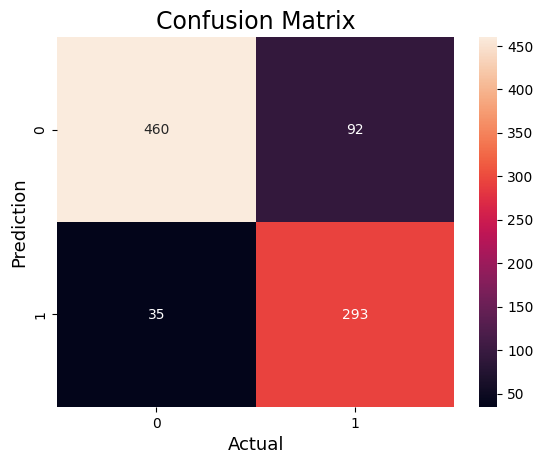

In [139]:
cm = confusion_matrix(ds_op['fraudulent'],ds_op['final_output'])
 
#Plot the confusion matrix.
sns.heatmap(cm,
            annot=True,
            fmt='g')
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [140]:
f1_score(ds_op['fraudulent'],ds_op['final_output'])

0.8218793828892006

In [141]:
# Model Accuracy
print("Classification Accuracy:", accuracy_score(ds_op['fraudulent'],ds_op['final_output']))
print("Classification Report\n")
print(classification_report(ds_op['fraudulent'],ds_op['final_output']))


Classification Accuracy: 0.8556818181818182
Classification Report

              precision    recall  f1-score   support

           0       0.93      0.83      0.88       552
           1       0.76      0.89      0.82       328

    accuracy                           0.86       880
   macro avg       0.85      0.86      0.85       880
weighted avg       0.87      0.86      0.86       880

